# Название проекта: Выявление профилей потребления интернет-магазина товаров для дома и быта "Пока все еще тут"

У нас есть датасет с описанием транзикций интернет-магазина «Пока все еще тут».

**Цель проекта:** сегментировать покупателей по профилю потребления.

**Бизнес-задачи:** 1. Создание помесячных предложений категорий товаров для каждого покупателя; 2. Повышение продаж; 3. Возвращение ушедших клиентов.

**Для выполнения намеченной цели необходимо выполнить следующие задачи:** 1. Сегментация товаров на основе принадлежности к той или иной товарной категории; 2. Анализ динамики выручки; 3. Анализ среднего чека и его динамика; 4. Анализ помесячной динамики средней выручки с покупателя; 5. Сегментация покупателей; 6. Анализ сегментов покупателей (к-во покупок, средний чек, основные продукты и категории); 7. Анализ категорий товаров и их сезонность по выделенным сегментам покупателей.

**Описание данных:** У нас есть один файл с данными — в нем представлены транзикции интернет-магазина «Пока все еще тут». Даны: дата заказа, идентификатор покупателя, идентификатор заказа, наименование товара, к-во товаров в заказе, цена товара.

# 1. Предобработка данных

In [2]:
#импортируем необходимые библиотеки
import pandas as pd
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [3]:
#импортируем данные
df = pd.read_csv('/datasets/ecom_dataset_upd.csv')
df.head(20)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


В данных 7474 строки, 6 колонок. Пропуски отсутствуют.

In [5]:
#приведем даты к нужному формату
df['date'] = pd.to_datetime(df['date'], format="%Y%m%d%H")
display(df['date'].min())
display(df['date'].max())
display(df['date'])

Timestamp('2018-10-01 00:00:00')

Timestamp('2020-01-31 15:00:00')

0      2018-10-01 00:00:00
1      2018-10-01 00:00:00
2      2018-10-01 00:00:00
3      2018-10-01 00:00:00
4      2018-10-01 00:00:00
               ...        
7469   2020-01-30 21:00:00
7470   2020-01-30 22:00:00
7471   2020-01-31 02:00:00
7472   2020-01-31 12:00:00
7473   2020-01-31 15:00:00
Name: date, Length: 7474, dtype: datetime64[ns]

Данные представлены датой и часом когда клиент сделал заказ.
В датасете присутствуют данные с 1 октября 2018 года, по 31 января 2020 года.

In [6]:
#проверим данные на наличие явных дубликатов
#перед проверкой приведем столбец 'product' к нижнему регистру
df['product'] = df['product'].str.lower()
df.duplicated().sum()

0

Явные дубликаты в данных отсутствуют.

In [7]:
#Оценим сколько в данных уникальных заказов
display(df['order_id'].nunique())
order = df['order_id'].value_counts()
order

3521

14833    888
14835    203
14753     90
14897     63
70960     60
        ... 
70639      1
68592      1
72690      1
68596      1
71898      1
Name: order_id, Length: 3521, dtype: int64

Уникальных заказов - 3521.

count    3521.000000
mean        2.122692
std        15.711199
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       888.000000
Name: order_id, dtype: float64

array([ 1.,  1.,  6., 16.])

Text(0, 0.5, 'Частота встречаемости')

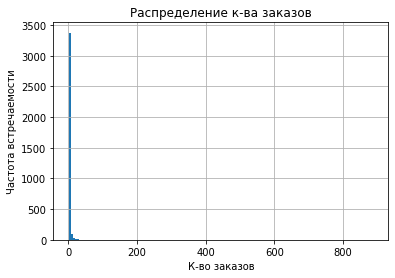

In [8]:
#Посмотрим распределение к-ва заказов
order.hist(bins=150)
display(order.describe())
display(np.percentile(order, [5, 81, 95, 99]))

plt.title('Распределение к-ва заказов')
plt.xlabel('К-во заказов')
plt.ylabel('Частота встречаемости')

В среднем в каждом заказе по 2 товара. 81% заказов - с 1 товаром. Максимальное количество товаров в 1 заказе - 888. 95% заказов имеет не более 6 товаров.

In [9]:
#оценим сколько заказов имеют больше 2 товаров.
order1 = order[order > 2]
display(order1.count())
order1.count()/order.count()*100

391

11.104799772791822

Больше двух товаров в заказе всего у 11% заказов (391 заказ)

In [10]:
#оценим к-во покупателей и сколько товаров заказал каждый покупатель
display(df['customer_id'].nunique())
customer = df['customer_id'].value_counts()
customer

2451

1d6c8c1f-a799-4418-9af2-1ded47d7a85c    888
db77c238-3c80-4032-9e3c-c30a43f4a650    203
c971fb21-d54c-4134-938f-16b62ee86d3b    144
3d5fef90-4a65-4a7e-84cf-010eba7b038d     90
42d3cb27-6519-4627-9b4a-5aa8ee600203     63
                                       ... 
7d4dca0a-17d9-4103-b67d-b3f9b5352343      1
749cef81-0af4-4620-b880-6a728df5dfe8      1
6ab10937-fd06-4010-9178-6b5bcc7cdc1d      1
8eff5b5c-750a-4d7e-ac93-16e87fae5ba6      1
7714a872-b521-4cbe-8115-c643e6ddf2ab      1
Name: customer_id, Length: 2451, dtype: int64

count    391.000000
mean      10.480818
std       46.352319
min        3.000000
25%        3.000000
50%        5.000000
75%        9.000000
max      888.000000
Name: order_id, dtype: float64

array([ 3. ,  3. , 21.5, 60.3])

Text(0, 0.5, 'Частота встречаемости')

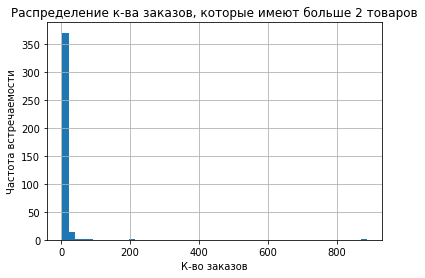

In [11]:
order1.hist(bins=50)
display(order1.describe())
display(np.percentile(order1, [5, 10, 95, 99]))

plt.title('Распределение к-ва заказов, которые имеют больше 2 товаров')
plt.xlabel('К-во заказов')
plt.ylabel('Частота встречаемости')

В данных 2451 клиент. Максимальное количество заказанных товаров на одного клиента - 888.

count    2451.000000
mean        3.049368
std        19.079629
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max       888.000000
Name: customer_id, dtype: float64

array([ 1. ,  1. ,  2. ,  8. , 22.5])

Text(0, 0.5, 'Частота встречаемости')

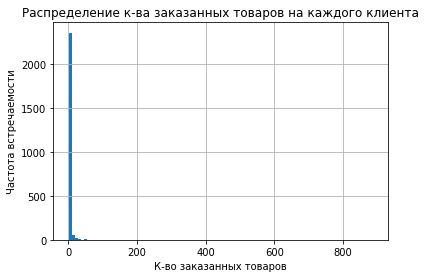

In [12]:
#посмотрим распределение к-ва заказанных товаров на каждого клиента.
customer.hist(bins=100)
display(customer.describe())
display(np.percentile(customer, [5, 42, 84, 95, 99]))

plt.title('Распределение к-ва заказанных товаров на каждого клиента')
plt.xlabel('К-во заказанных товаров')
plt.ylabel('Частота встречаемости')

В среднем каждый клиент заказал 3 товара. 42% клиентов - заказали 1 товар, а 84% - не более 2. Максимальное количество товаров у одного клиента - 888. 95% заказов имеет не более 6 товаров.

In [13]:
customer1 = customer[customer > 2]
display(customer1.count())
customer1.count()/customer.count()*100

377

15.381476948184414

Больше двух товаров у 15% клиентов (377 клиентов).

In [14]:
#посмотрим количество наименований товаров и сколько раз каждое наименование фигурировало в заказах.
display(df['product'].nunique())
product = df['product'].value_counts()
product.head(110)

2341

рассада кабачка сорт зебра кассета 6 шт e6                                      79
рассада кабачка сорт золотинка кассета 6 шт e6                                  78
пеларгония розебудная red pandora укорененный черенок                           77
рассада кабачка сорт белогор кассета 6 шт e6                                    77
рассада огурец фараон ячейки по 6 шт е6                                         76
                                                                                ..
корыто оцинкованное 45 л бесшовное, 1303007                                     10
рассада зелени для кухни розмарина в кассете по 6 шт                            10
карниз для ванной комнаты виолет раздвижной 210 см с кольцами голубой 2110/3    10
лобелия регатта regatta микс объем 0,5 л                                        10
вербена крупноцветковая white белая объем 0,5 л                                  9
Name: product, Length: 110, dtype: int64

Всего 2341 продукт. Топ три в заказах занимает наименование "рассада".

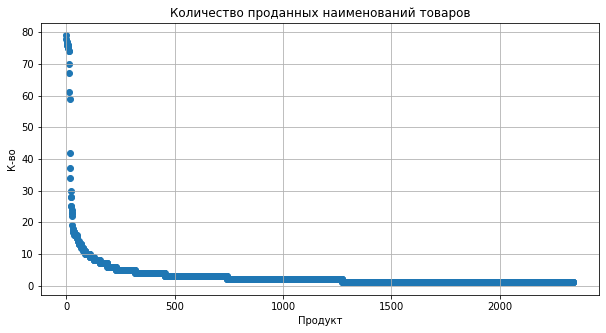

In [15]:
# постоим общий график количества проданных наименований товаров
x_values = pd.Series(range(0, len(product)))
  
plt.figure(figsize=(10,5)) 
 
scattter_plot = plt.scatter(x_values, product)  

plt.ylabel('К-во') 
plt.xlabel('Продукт') 
plt.title('Количество проданных наименований товаров')
plt.grid()
plt.show()

Около 110 наименований товаров присутствовало в заказах более 10 раз.

count     7474.000000
mean       478.737501
std        901.615895
min          9.000000
25%         97.000000
50%        135.000000
75%        439.000000
max      14917.000000
Name: price, dtype: float64

array([  37. ,   44. , 1987. , 4614.5])

Text(0, 0.5, 'Частота встречаемости')

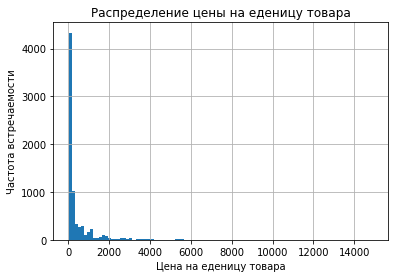

In [16]:
#посмотрим распределение цены на еденицу товара
display(df['price'].describe())
display(np.percentile(df['price'], [5, 10, 95, 99]))
df['price'].hist(bins=100)

plt.title('Распределение цены на еденицу товара')
plt.xlabel('Цена на еденицу товара')
plt.ylabel('Частота встречаемости')

Средняя цена одного наименования в магазине - 478 руб. Имеется перекос средней в сторону большей стоимости. 95% товаров не дороже 2000. Максимальная стоимость товара - 14917 руб. Минимальная - 9 руб.

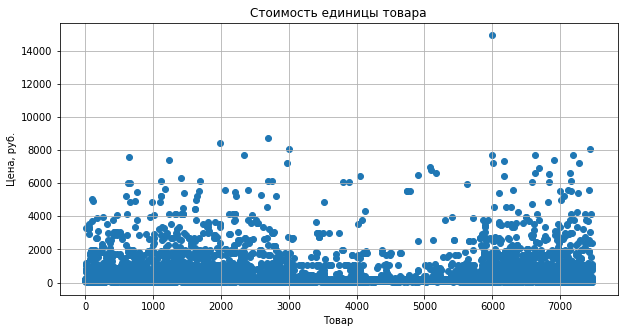

In [17]:
# постоим общий график стоимости товаров
x_values = pd.Series(range(0, len(df['price'])))
  
plt.figure(figsize=(10,5)) 
 
scattter_plot = plt.scatter(x_values, df['price'])  

plt.ylabel('Цена, руб.') 
plt.xlabel('Товар') 
plt.title('Cтоимость единицы товара')
plt.grid()
plt.show()

График подтверждает выводы выше...

In [18]:
#проверим товары с минимальной и максимальной ценой.
display(df[df['price'] == df['price'].min()])
df[df['price'] == df['price'].max()]

,date,customer_id,order_id,product,quantity,price
1069,2018-12-03 11:00:00,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,"алиссум (лобулярия) снежные одежды 0,2 г 46500...",2,9.0
1078,2018-12-03 11:00:00,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,"львиный зев волшебный ковер 0,05 г 4660010779639",1,9.0
2159,2019-03-04 15:00:00,0f47231c-3a68-404a-88f7-08a4a172c17f,14559,"горох амброзия 10,0 г 4660010772616",1,9.0
5642,2019-07-03 22:00:00,1ec1ad59-a29b-4949-929d-f4fc4fe14758,14887,"алиссум (лобулярия) снежные одежды 0,2 г 46500...",1,9.0
7073,2019-12-17 12:00:00,1f7a71e2-0e7a-47ee-89d8-320b6315f4c7,107078,"львиный зев волшебный ковер 0,05 г 4660010779639",1,9.0


,date,customer_id,order_id,product,quantity,price
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400...,1,14917.0


Оставляем данные товары... Это не аномалии...

count    7474.000000
mean        2.362858
std        14.500497
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1000.000000
Name: quantity, dtype: float64

array([ 1.,  1.,  2.,  5., 25.])

Text(0, 0.5, 'Частота встречаемости')

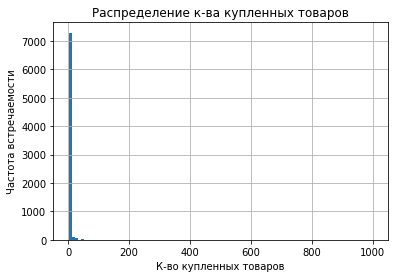

In [19]:
#посмотрим распределение к-ва купленных товаров
display(df['quantity'].describe())
display(np.percentile(df['quantity'], [5, 82, 90, 95, 99]))
df['quantity'].hist(bins=100)

plt.title('Распределение к-ва купленных товаров')
plt.xlabel('К-во купленных товаров')
plt.ylabel('Частота встречаемости')

В среднем было куплено каждого наименования по 2 штуки. 82% наименований купили только один раз. 90% - не более 2 раз. 95% наименований было куплено не более 5 раз. Максимально товар был куплен 1000 раз.

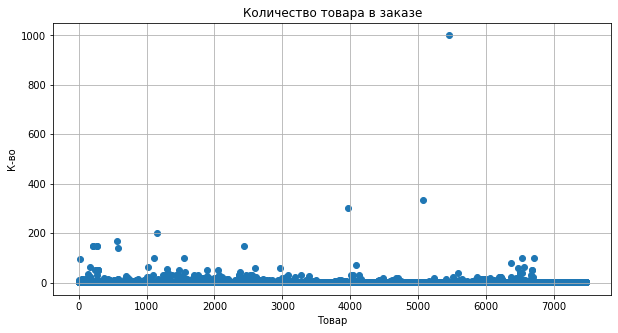

In [20]:
# постоим общий график стоимости товаров
x_values = pd.Series(range(0, len(df['quantity'])))
  
plt.figure(figsize=(10,5)) 
 
scattter_plot = plt.scatter(x_values, df['quantity'])  

plt.ylabel('К-во') 
plt.xlabel('Товар') 
plt.title('Количество товара в заказе')
plt.grid()
plt.show()

График подтверждает выводы выше...

In [21]:
#проверим заказ в котором товар купили 1000 раз.
df[df['quantity'] == df['quantity'].max()]

,date,customer_id,order_id,product,quantity,price
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0


Это аномальные данные, далее проверим выручку по заказам.

count      7474.000000
mean        716.877765
std        7939.831129
min           9.000000
25%         120.000000
50%         164.000000
75%         614.000000
max      675000.000000
dtype: float64

array([  38.  ,   74.  , 2699.  , 5672.26])

Text(0, 0.5, 'Частота встречаемости')

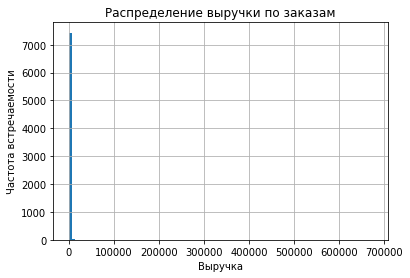

In [22]:
#посмотрим распределение выручки по заказам
viruchka = df['quantity']*df['price']
display(viruchka.describe())
display(np.percentile(viruchka, [5, 10, 95, 99]))
viruchka.hist(bins=100)

plt.title('Распределение выручки по заказам')
plt.xlabel('Выручка')
plt.ylabel('Частота встречаемости')

Средняя выручка с заказа - 710 руб. (средний чек). 95% заказов стоимостью не более 2700 руб. Максимальый заказ на сумму 675000 руб. Этот тот самый заказ где куплено 1000 вантузов... Удалим его.

In [23]:
df = df[df['quantity'] != (df['quantity'].max())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7473 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         7473 non-null   datetime64[ns]
 1   customer_id  7473 non-null   object        
 2   order_id     7473 non-null   int64         
 3   product      7473 non-null   object        
 4   quantity     7473 non-null   int64         
 5   price        7473 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 408.7+ KB


count     7473.000000
mean       626.648524
std       1480.883443
min          9.000000
25%        120.000000
50%        164.000000
75%        614.000000
max      49432.000000
dtype: float64

array([  38.  ,   74.  , 2699.  , 5613.04])

Text(0, 0.5, 'Частота встречаемости')

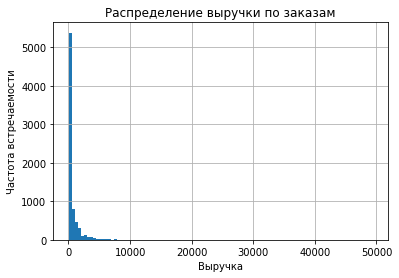

In [24]:
#посмотрим распределение выручки по заказам после удаления дорогого заказа
viruchka = df['quantity']*df['price']
display(viruchka.describe())
display(np.percentile(viruchka, [5, 10, 95, 99]))
viruchka.hist(bins=100)

plt.title('Распределение выручки по заказам')
plt.xlabel('Выручка')
plt.ylabel('Частота встречаемости')

Аномальный заказ удалили.

In [25]:
#посмотрим распределение времени заказа
order_date = df[['date','order_id']].drop_duplicates()
display(order_date)
display(df['order_id'].nunique())

,date,order_id
0,2018-10-01 00:00:00,68477
7,2018-10-01 08:00:00,68479
8,2018-10-01 08:00:00,68478
9,2018-10-01 09:00:00,68480
10,2018-10-01 11:00:00,68483
...,...,...
7469,2020-01-30 21:00:00,104002
7470,2020-01-30 22:00:00,107336
7471,2020-01-31 02:00:00,106336
7472,2020-01-31 12:00:00,102002


3520

В данных 4154 уникальных пары "дата-заказ" и 3520 уникальных заказов

In [26]:
#посмотрим распределение дат на заказ
order_date_all = order_date.groupby('order_id').agg({'date':'nunique'})
display(order_date_all.sort_values(by='date', ascending=False).head(20))

,date
order_id,
14833,74
70960,60
69162,23
71148,16
69531,12
70419,10
69527,9
71463,9
70962,8


Мы обнаружили, что на один заказ имеется до 74 дат... Это аномальные данные, необходимо их вычистить. У одного заказа может быть только 1 дата. Удалим дополнительные даты, оставим последнюю дату.

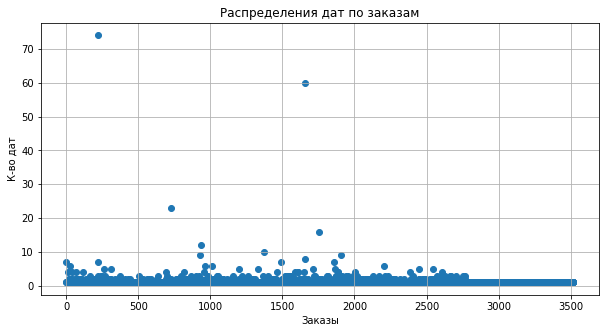

In [27]:
# постоим график распределения дат по заказам
x_values = pd.Series(range(0, len(order_date_all)))
  
plt.figure(figsize=(10,5)) 
 
scattter_plot = plt.scatter(x_values, order_date_all)  

plt.ylabel('К-во дат') 
plt.xlabel('Заказы') 
plt.title('Распределения дат по заказам')
plt.grid()
plt.show()

График подтверждает данные выше...

Далее приведем код для удаления лишних дат из заказов.

In [28]:
#Оценим сколько заказов имеют более 1 даты.
order_date_all_date = order_date_all[order_date_all['date'] >= 2].count()
display(order_date_all_date)
order_date_all1 = order_date_all[order_date_all['date'] >= 2].sort_values(by='date', ascending=False).head(order_date_all_date[0])
display(order_date_all1)
order_date_all1_list = list(order_date_all1.index)
display(order_date_all1_list)

date    284
dtype: int64

,date
order_id,
14833,74
70960,60
69162,23
71148,16
69531,12
...,...
70424,2
70438,2
70450,2


[14833,
 70960,
 69162,
 71148,
 69531,
 70419,
 71463,
 69527,
 70962,
 70620,
 71341,
 14835,
 13547,
 69694,
 69598,
 14521,
 72066,
 71363,
 70115,
 72720,
 71054,
 72518,
 68474,
 70356,
 14896,
 69109,
 71413,
 70862,
 14500,
 70856,
 70828,
 69310,
 70939,
 72402,
 69586,
 70567,
 71400,
 71663,
 72845,
 14664,
 14570,
 14541,
 70412,
 71934,
 69506,
 71074,
 73002,
 70718,
 71089,
 70697,
 70217,
 71257,
 70677,
 71573,
 71689,
 69640,
 70726,
 73104,
 71249,
 70031,
 72124,
 72075,
 69797,
 69807,
 73136,
 70463,
 71633,
 72011,
 69485,
 69421,
 71398,
 70734,
 72824,
 68760,
 72790,
 68574,
 72861,
 71370,
 72870,
 68996,
 71368,
 69118,
 72926,
 14897,
 14872,
 14863,
 69282,
 72940,
 14836,
 14753,
 70769,
 71480,
 71542,
 72434,
 70144,
 71750,
 71648,
 71733,
 71461,
 71638,
 71623,
 71614,
 71612,
 71595,
 71560,
 71479,
 71761,
 71450,
 71426,
 71390,
 71299,
 71271,
 71758,
 72169,
 71803,
 72590,
 72608,
 72615,
 72683,
 72697,
 72717,
 72744,
 72753,
 72778,
 72786,


284 заказа имеют более 1 даты. Мы вывели номера таких заказов в отдельный файл.

In [29]:
#далее, выведем данные по предыдущим заказам - по дате, номеру заказа и "номер заказа+продукт". И отсортируем по дате.
df_order_date_all1 = df[['date', 'order_id', 'product']].query("order_id == @order_date_all1_list")
display(df_order_date_all1.sort_values(by='date', ascending=False))
display(df_order_date_all1.groupby('order_id').agg({'date':'nunique'}).sort_values(by='date', ascending=False))

df_order_date_all1.groupby('date').agg({'order_id':'nunique'}).sort_values(by='order_id', ascending=False)


,date,order_id,product
6736,2019-10-31 16:00:00,73137,сумка-тележка 2-х колесная gimi argo синяя
6729,2019-10-31 02:00:00,73136,"таз пластмассовый со стиральной доской (иж), 1..."
6728,2019-10-31 00:00:00,73136,"таз пластмассовый со стиральной доской (иж), 1..."
6717,2019-10-30 09:00:00,73137,сумка-тележка 2-х колесная gimi argo синяя
6716,2019-10-30 07:00:00,73136,"таз пластмассовый со стиральной доской (иж), 1..."
...,...,...,...
19,2018-10-01 21:00:00,68474,доска гладильная eurogold professional 130х48 ...
17,2018-10-01 18:00:00,68476,стеклянная крышка для сковороды alpenkok 26 см...
16,2018-10-01 18:00:00,68476,сковорода алюминиевая с антипригарным покрытие...
18,2018-10-01 18:00:00,68476,"сушилка для белья напольная colombo star 18, 3679"


,date
order_id,
14833,74
70960,60
69162,23
71148,16
69531,12
...,...
70424,2
70438,2
70450,2


,order_id
date,
2018-12-23 12:00:00,4
2019-06-05 14:00:00,3
2019-06-24 09:00:00,2
2019-06-07 12:00:00,2
2019-06-07 22:00:00,2
...,...
2019-03-06 14:00:00,1
2019-03-06 16:00:00,1
2019-03-06 20:00:00,1


In [30]:
df_order_date_all1[df_order_date_all1['date'] == '2018-12-23 12:00:00']

,date,order_id,product
1317,2018-12-23 12:00:00,69528,сушилка для белья потолочная лиана люкс 180 см...
1318,2018-12-23 12:00:00,69520,новогоднее дерево ель сербская d-21 см h-60 см
1319,2018-12-23 12:00:00,69527,плед флисовый 200х150 см wellness wplny152-зим...
1320,2018-12-23 12:00:00,69162,термометр на окно уличный на липучках т-5 h-20...


Основная масса лишних дат была удалена. Но все же остались заказы с лишними датами. Разбираемся дальше...

In [31]:
df_correct = df.sort_values(by='date', ascending=False).drop_duplicates(subset=['order_id', 'product'], keep='first')
df_correct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5553 entries, 7473 to 0
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5553 non-null   datetime64[ns]
 1   customer_id  5553 non-null   object        
 2   order_id     5553 non-null   int64         
 3   product      5553 non-null   object        
 4   quantity     5553 non-null   int64         
 5   price        5553 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 303.7+ KB


После первого удаления осталось 5554 строки.

In [32]:
#выведем снова пары "дата-номер заказа"
order_date_cor = df_correct[['date','order_id']].drop_duplicates()
order_date_cor

,date,order_id
7473,2020-01-31 15:00:00,103225
7472,2020-01-31 12:00:00,102002
7471,2020-01-31 02:00:00,106336
7470,2020-01-30 22:00:00,107336
7469,2020-01-30 21:00:00,104002
...,...,...
10,2018-10-01 11:00:00,68483
9,2018-10-01 09:00:00,68480
8,2018-10-01 08:00:00,68478
7,2018-10-01 08:00:00,68479


In [33]:
#проверим количество дат на заказ
order_date_cor = df_correct[['date','order_id']].drop_duplicates()
order_date_all_cor = order_date_cor.groupby('order_id').agg({'date':'nunique'})
order_date_all_cor_cor = order_date_all_cor.sort_values(by='date', ascending=False).head(16)
display(order_date_all_cor_cor)

,date
order_id,
68760,3
14649,2
70186,2
70318,2
71143,2
14500,2
71426,2
14897,2
69527,2


Лишних дат стало значительно меньше - но все же есть. Разбираемся дальше...

In [34]:
#выведем номера этих заказов
order_date_all_cor_cor_index_list = list(order_date_all_cor_cor.index)
order_date_all_cor_cor_index_list

[68760,
 14649,
 70186,
 70318,
 71143,
 14500,
 71426,
 14897,
 69527,
 72517,
 70995,
 14541,
 68814,
 69807,
 69750,
 69485]

In [35]:
#посмотрим товары в одинаковых заказах с разной датой
df_order_date_all_cor_cor_index = df_correct.query("order_id == @order_date_all_cor_cor_index_list")
df_order_date_all_cor_index_sort = df_order_date_all_cor_cor_index[['date', 'order_id', 'product']].sort_values(by='order_id', ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_order_date_all_cor_index_sort)

display(df_order_date_all_cor_index_sort['date'].nunique())   
display(df_order_date_all_cor_index_sort[['date', 'order_id']].nunique()) 
display(df_order_date_all_cor_index_sort['order_id'].nunique())
df_order_date_all_cor_index_sort.groupby('date').agg({'order_id':'nunique'}).sort_values(by='order_id', ascending=False)

,date,order_id,product
6263,2019-09-05 22:00:00,72517,бальзамин новогвинейский d-13 см ярко красный
6258,2019-09-05 14:00:00,72517,бальзамин новогвинейский d-13 см лососевый
3789,2019-05-14 16:00:00,71426,стремянка colombo factotum 3 ступени алюминий ...
3797,2019-05-15 00:00:00,71426,стремянка colombo factotum 3 ступени стальная ...
2850,2019-04-15 07:00:00,71143,муляж банан желтый 21 см полиуретан
2948,2019-04-18 15:00:00,71143,муляж апельсин 8 см полиуретан
2632,2019-04-03 17:00:00,70995,чехол для гладильной доски zalger 520133 120х4...
2743,2019-04-08 15:00:00,70995,настенная сушилка для белья gimi brio super 80
1938,2019-02-21 13:00:00,70318,сковорода алюминиевая с антипригарным покрытие...
1886,2019-02-18 11:00:00,70318,гладильная доска dogrular домина 125х42 см 223708


33

date        33
order_id    16
dtype: int64

16

,order_id
date,
2018-10-26 13:00:00,1
2019-02-17 13:00:00,1
2019-09-05 14:00:00,1
2019-07-10 23:00:00,1
2019-07-10 09:00:00,1
2019-05-15 00:00:00,1
2019-05-14 16:00:00,1
2019-04-18 15:00:00,1
2019-04-16 16:00:00,1


Выяснилось, что это заказы, в которых покупатель сначала хотел купить одни товары, а по факту купил другие. Удалим лишние даты. Оставим только последние. 

In [36]:
#определим дату которую нужно оставить в закзах
df_order_date_all_cor_index_sort_ost = df_order_date_all_cor_index_sort.sort_values(by='date', ascending=False).drop_duplicates(subset=('order_id'), keep='first')
display(df_order_date_all_cor_index_sort_ost)
df_order_date_all_cor_index_so_list = list(df_order_date_all_cor_index_sort_ost['date'].unique())
df_order_date_all_cor_index_so_list

,date,order_id,product
6263,2019-09-05 22:00:00,72517,бальзамин новогвинейский d-13 см ярко красный
5820,2019-07-10 23:00:00,14897,вигна лилиана в кассете 4 штуки среднеспелая
3797,2019-05-15 00:00:00,71426,стремянка colombo factotum 3 ступени стальная ...
2948,2019-04-18 15:00:00,71143,муляж апельсин 8 см полиуретан
2903,2019-04-16 16:00:00,14649,"петуния sweetunia black satin черная объем 0,5 л"
2743,2019-04-08 15:00:00,70995,настенная сушилка для белья gimi brio super 80
1984,2019-02-24 12:00:00,14541,рассада зелени для кухни душица-орегано розовы...
1938,2019-02-21 13:00:00,70318,сковорода алюминиевая с антипригарным покрытие...
1814,2019-02-13 12:00:00,69750,сумка-тележка хозяйственная gimi rolling therm...
1807,2019-02-12 21:00:00,69807,"стремянка металлическая 3 ступени, см3, ника"


[numpy.datetime64('2019-09-05T22:00:00.000000000'),
 numpy.datetime64('2019-07-10T23:00:00.000000000'),
 numpy.datetime64('2019-05-15T00:00:00.000000000'),
 numpy.datetime64('2019-04-18T15:00:00.000000000'),
 numpy.datetime64('2019-04-16T16:00:00.000000000'),
 numpy.datetime64('2019-04-08T15:00:00.000000000'),
 numpy.datetime64('2019-02-24T12:00:00.000000000'),
 numpy.datetime64('2019-02-21T13:00:00.000000000'),
 numpy.datetime64('2019-02-13T12:00:00.000000000'),
 numpy.datetime64('2019-02-12T21:00:00.000000000'),
 numpy.datetime64('2019-02-12T17:00:00.000000000'),
 numpy.datetime64('2019-01-03T22:00:00.000000000'),
 numpy.datetime64('2018-12-26T23:00:00.000000000'),
 numpy.datetime64('2018-12-23T18:00:00.000000000'),
 numpy.datetime64('2018-10-31T13:00:00.000000000'),
 numpy.datetime64('2018-10-29T17:00:00.000000000')]

In [37]:
#определим индексы которые необходимо удалить
df_order_date_all_cor_index_sort_delite = df_order_date_all_cor_index_sort.query("date != @df_order_date_all_cor_index_so_list")
display(df_order_date_all_cor_index_sort_delite)
display(df_order_date_all_cor_index_sort_delite.count())

df_order_date_all_cor_index_sort_delite_list = list(df_order_date_all_cor_index_sort_delite.index)
df_order_date_all_cor_index_sort_delite_list

,date,order_id,product
6258,2019-09-05 14:00:00,72517,бальзамин новогвинейский d-13 см лососевый
3789,2019-05-14 16:00:00,71426,стремянка colombo factotum 3 ступени алюминий ...
2850,2019-04-15 07:00:00,71143,муляж банан желтый 21 см полиуретан
2632,2019-04-03 17:00:00,70995,чехол для гладильной доски zalger 520133 120х4...
1886,2019-02-18 11:00:00,70318,гладильная доска dogrular домина 125х42 см 223708
1765,2019-02-10 10:00:00,70186,"комнатное растение в горшке алое вера, d12, h30"
1508,2019-01-14 08:00:00,69807,"контейнер для свч полимербыт премиум 1,2 л 435..."
1460,2019-01-09 14:00:00,69750,сумка-тележка хозяйственная gimi rolling therm...
1340,2018-12-24 09:00:00,69527,плед флисовый 200х150 см wellness wplny152-зим...
1282,2018-12-20 16:00:00,69485,набор столовых приборов 24 предмета saint germ...


date        37
order_id    37
product     37
dtype: int64

[6258,
 3789,
 2850,
 2632,
 1886,
 1765,
 1508,
 1460,
 1340,
 1282,
 565,
 424,
 427,
 423,
 418,
 416,
 463,
 435,
 5773,
 5792,
 5789,
 5788,
 5787,
 5786,
 5774,
 5775,
 5793,
 5790,
 5783,
 5785,
 5784,
 5791,
 2874,
 1870,
 1866,
 499,
 497]

In [38]:
#удалим лишние строки
df_correct = df_correct.query("index != @df_order_date_all_cor_index_sort_delite_list")
display(df_correct.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5516 entries, 7473 to 0
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5516 non-null   datetime64[ns]
 1   customer_id  5516 non-null   object        
 2   order_id     5516 non-null   int64         
 3   product      5516 non-null   object        
 4   quantity     5516 non-null   int64         
 5   price        5516 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 301.7+ KB


None

После второго удаления в датасете осталось 5517 строк.

In [39]:
#проверим количество уникальных дат на заказ
order_date_cor_c = df_correct[['date','order_id']].drop_duplicates()
order_date_all_cor_c = order_date_cor_c.groupby('order_id').agg({'date':'nunique'})
order_date_all_cor_cor_c = order_date_all_cor_c.sort_values(by='date', ascending=False).head(10)
display(order_date_all_cor_cor_c)

,date
order_id,
12624,1
72333,1
72315,1
72320,1
72321,1
72322,1
72323,1
72325,1
72327,1


У всех заказов одна дата. С этим разобрались.

In [40]:
#выведем уникальные пары "клиент-номер заказа"
display(df_correct['customer_id'].nunique())
customer_order = df_correct[['customer_id', 'order_id']].drop_duplicates()
customer_order


2429

,customer_id,order_id
7473,2e460a26-35af-453d-a369-a036e95a40e0,103225
7472,cdd17932-623e-415f-a577-3b31312fd0e2,102002
7471,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336
7470,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336
7469,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002
...,...,...
10,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483
9,c971fb21-d54c-4134-938f-16b62ee86d3b,68480
8,6644e5b4-9934-4863-9778-aaa125207701,68478
7,375e0724-f033-4c76-b579-84969cf38ee2,68479


In [41]:
#посмотрим распределение заказов по клиентам и клиентов по заказам
customer_order_count = customer_order.groupby('customer_id').agg({'order_id':'count'})
order_count_customer = customer_order.groupby('order_id').agg({'customer_id':'count'})
display(customer_order_count.sort_values(by='order_id', ascending=False).head(20), order_count_customer.sort_values(by='customer_id', ascending=False).head(5))
    
order_count_customer2 = order_count_customer[order_count_customer >= 2].count()    
display(order_count_customer2)
order_count2_customer = order_count_customer.sort_values(by='customer_id', ascending=False).head(order_count_customer2[0])



,order_id
customer_id,
c971fb21-d54c-4134-938f-16b62ee86d3b,126
4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
b7b865ab-0735-407f-8d0c-31f74d2806cc,7
0184f535-b60a-4914-a982-231e3f615206,5
e0535076-6270-4df2-8621-cb06264a94fa,4
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4
bea7a833-2074-42db-bc49-4457abd3c930,4
7d64b4ea-d03f-4c3a-b283-21b3d0d237f1,3


,customer_id
order_id,
12624,1
72333,1
72315,1
72320,1
72321,1


customer_id    0
dtype: int64

У одного покупателя может быть несколько закзов. В наших данных максимально 126 заказов у клиента. Но не было обнаружено, ни одного заказа у которого больше одного пользователя (это на очищенных данных, на неочищенных данных таких аномалий было больше. До 4 клиентов на один заказ).

Все данные очистили от неявных дубликатов. В датасете осталось 5517 строк.

In [42]:
#потеряли позиций в заказах
100-df_correct['order_id'].count()*100/df['order_id'].count()

26.187608724742404

В процессе удаления - мы потеряли 26% данных

In [43]:
#оценим количество заказов до и после удаления
display(df_correct['order_id'].nunique())
df['order_id'].nunique()

3520

3520

Количество заказов не изменилось.

In [44]:
#оценим количество покупателей до и после удаления
display(df_correct['customer_id'].nunique())
df['customer_id'].nunique()

2429

2450

Потерялось 21 покупатель. Это те самые клиенты которые были дубликатами у заказов с несколькими клиентами.

In [45]:
#оценим количество дат до и после удаления
display(df_correct['date'].nunique())
display(df['date'].nunique())
100-df_correct['date'].nunique()*100/df['date'].nunique()


2719

3125

12.992000000000004

Потерялось 13% дат.

In [46]:
#оценим количество продуктов до и после удаления
display(df_correct['product'].nunique())
df['product'].nunique()

2333

2340

Потерялось 7 продуктов. Посмотрим, что это за продукты.

In [47]:
product_delit = list(df_correct['product'].unique())
df_correct1 = df.query("product != @product_delit")
df_correct1

,date,customer_id,order_id,product,quantity,price
419,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,гладильная доска sarayli tamara 125x42 см,1,3074.0
423,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,"короб стеллажный с крышкой большой, 30*40*25 с...",1,674.0
424,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,"короб стеллажный с крышкой малый, 28*30*16 см,...",3,524.0
463,2018-10-27 23:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,гладильная доска sarayli tamara 125x42 см,1,3074.0
1282,2018-12-20 16:00:00,5be0f4b4-947f-4672-b147-73ef5936ecd4,69485,набор столовых приборов 24 предмета saint germ...,1,1087.0
1319,2018-12-23 12:00:00,eb04c06f-bee9-45bd-9392-4addbc54952f,69527,плед флисовый 200х150 см wellness wplny152-зим...,1,712.0
1325,2018-12-23 15:00:00,eb04c06f-bee9-45bd-9392-4addbc54952f,69527,плед флисовый 200х150 см wellness wplny152-зим...,1,712.0
1340,2018-12-24 09:00:00,eb04c06f-bee9-45bd-9392-4addbc54952f,69527,плед флисовый 200х150 см wellness wplny152-зим...,1,712.0
3789,2019-05-14 16:00:00,d05e3c48-3745-408e-8880-d787e06062ae,71426,стремянка colombo factotum 3 ступени алюминий ...,1,1949.0
6258,2019-09-05 14:00:00,51851f8e-e239-4e31-ab2c-4b67ab2c76da,72517,бальзамин новогвинейский d-13 см лососевый,1,134.0


Это продукты которые первоначально были добавлены в корзины покупателей, но в итоге так и не были куплены. Покупатель передумал и купил, другие товары. А эти больше никто не купил.

In [48]:
#оценим общее количество стоимости товаров до и после удаления
display(df_correct['price'].sum())
display(df['price'].sum())
100-df_correct['price'].sum()*100/df['price'].sum()


2935897.083333333

3577409.083333333

17.932307573900843

После удаления общая стоимость всех товаров уменьшилась на 17%

In [49]:
#добавим необходимый столбец для дальнейших расчетов
df_correct['price_quantity'] = df_correct['quantity']*df_correct['price']
df_correct['price_quantity']

7473    104.0
7472    128.0
7471    354.0
7470    869.0
7469     76.0
        ...  
3       179.0
1       194.0
5       164.0
6       134.0
0       142.0
Name: price_quantity, Length: 5516, dtype: float64

In [50]:
#к сожалению я поняла это уже перед сдачей проекта и что бы не менять все в расчетах, 
#решила поменять название колонок. Сорри...
df_correct = df_correct.rename(columns={'price': 'price_product', 'price_quantity':'price'})
df_correct

,date,customer_id,order_id,product,quantity,price_product,price
7473,2020-01-31 15:00:00,2e460a26-35af-453d-a369-a036e95a40e0,103225,вешалка для блузок 41 см красный attribute ahm781,1,104.0,104.0
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0,354.0
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0,869.0
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0,76.0
...,...,...,...,...,...,...,...
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164.0,164.0
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,юкка нитчатая d-12 см h-25-35 см,1,134.0,134.0


**Промежуточные выводы по данному разделу:**

1. В сырых данных 7474 строки, 6 колонок. 

2. В датасете присутствуют данные с 1 октября 2018 года по 31 января 2020 года.

3. Пропуски отсутствуют.

4. Явные дубликаты в данных отсутствуют.

5. Уникальных заказов - 3521. В среднем в каждом заказе по 2 товара. 81% заказов - с 1 товаром. Максимальное количество товаров в 1 заказе - 888. 95% заказов имеет не более 6 товаров.

6. В данных 2451 клиент. В среднем каждый клиент заказал 3 товара. 42% клиентов - заказали 1 товар, а 84% - не более 2. Максимальное количество товаров у одного клиента - 888. 95% заказов имеет не более 6 товаров.

7. Всего 2341 продукт. Топ три в заказах занимает наименование "рассада". Около 110 наименований товаров присутствовало в заказах более 10 раз.

8. Средняя цена одного наименования в магазине - 478 руб. Имеется перекос средней в сторону большей стоимости. 95% товаров не дороже 2000. Максимальная стоимость товара - 14917 руб. Минимальная - 9 руб.

9. В среднем было куплено каждого наименования по 2 штуки. 82% наименований купили только один раз. 90% - не более 2 раз. 95% наименований было куплено не более 5 раз. Максимально товар был куплен 1000 раз.

10. Были обнаружены неявные дубликаты по датам и клиентам (у одного заказа несколько дат и у одного заказа несколько клиентов). Мы вычистили данные, удалив неявные дубликаты.

11. После удаления в датасете осталось 5517 строк. Потеряли 26% данных. Количество заказов не изменилось. Потерялось 21 покупатель. Это те самые клиенты, которые были дубликатами у заказов с несколькими клиентами. Потерялось 13% дат.

12. Потерялось 7 продуктов. Это продукты которые первоначально были добавлены в корзины покупателей, но в итоге так и не были куплены. Покупатель передумал и купил, другие товары. А эти больше никто не купил.


# 2. Исследовательский анализ данных

In [51]:
#оценим количество товаров в датасете
display(df_correct['product'].nunique())
product_correct = df_correct['product'].value_counts()


2333

In [52]:
#выведем лист с наименованием товаров и сортируем его по алфавиту
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
     display(product_correct.index.sort_values().unique().tolist())

['tepмокружка avex freeflow 700 мл зеленый avex0759',
 'tepмокружка avex freeflow 700 мл сталь avex0776',
 'tepмокружка avex recharge 500 мл голубой avex0681',
 'автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114',
 'агератум рассада однолетних цветов в кассете по 10 шт',
 'адиантум лиза d-12 см',
 'азалия индика биколор d-12 см',
 'азалия индика биколор d-12 см h-20',
 'азалия индика розовая d-12 см h-20',
 'азалия индика фиолетовая d-10 см h-20',
 'аквилегия махровая тауэр смесь окрасок объем 1 л',
 'аквилегия обыкновенная барлоу микс объем 1 л',
 'алиссум (лобулярия) снежные одежды 0,2 г 4650091480302',
 'алиссум рассада однолетних цветов в кассете по 10 шт',
 'алиссум рассада однолетних цветов в кассете по 6 шт',
 'алиссум скальный желтый объем 1 л',
 'алоэ вера d-12 см h-25 см',
 'альбука спиралис фризл-сизл d-12 см',
 'амариллис red lion темно-красный в горшке d-12 см 1 луковица',
 'анемона белый объем 0,5 л',
 'антижир posh one magnum 828 мл россия 4580390-927058

In [53]:
# Cоздадим список с сегментами товаров
list_products = {
    'Для кухни':['рассекатель пламени', 'набор посуды', 'набор кружек', 'стакан', 'стаканов', 'вкладыши для хранения', 'банка', 'банок', 'блюдо', 'салатник', 'скатерть', 'салфет', 'блюд', 'кувшин', 'тарел', 'овощеварка', 'хлебница', 'сковород', 'измельчитель', 'терка', 'просеиватель', 'вилка', 'разделоч', 'кружка', 'чайник', 'чайны', 'скалка', 'нож', 'миксер', 'свч', 'половник', 'толкушка', 'сито', 'посудомоеч', 'соковыжим', 'кекс', 'косточ', 'бокал', 'ковш', 'вакуум', 'тортница', 'яйц', 'кипятильник', 'фужер', 'лоток', 'овощечистка', 'соус', 'чеснока', 'пикник', 'противень', 'губка', 'картофелемялка', 'дуршлаг', 'миска', 'столов', 'орехоколка', 'масленка', 'рыбочистка', 'кастрюля', 'сахарница', 'сотейник', 'электроштопор', 'форма', ' термос ', 'термос ', 'мантоварка', 'бидон', 'соковарка', 'бутыл', 'антижир', 'венчик', 'выпечки', 'бульонница', 'лопатка', 'котел', 'шприц', 'ложка'], 
    'Для ванной/туалета':[' ванн', 'ванна 70 л', 'кольца', 'унитаз', 'туалет'],
    'Уборка/стирка/глажка':['чехол для короткой', 'чехол eurogold', 'отжим для ведра', 'урна уличная', 'урна-пепельница', 'утюг', 'сушилка', 'скребок', 'совком', 'насадка', ' урна', 'таз', 'корыто', 'радиатор', 'белья', 'окномойка', 'тряпкодержатель', 'хлора', 'веник', 'мыло', 'мусор', 'перчатки', 'налет', 'прищеп', 'ведро', 'вантуз', 'подголовник', 'засор', 'дозатор', 'зубн', 'увлаж', 'глад', 'глаж', 'совок', 'гигиен', 'пятен', 'биопорошок', 'отбеливатель', 'стир', 'ролик', 'тряпка', 'ткань', 'подрукавник', 'швабра', 'щетка', 'мытья пола'],
    'Для дома':['кольца для штор', 'пылесос', 'ящик для хранения', 'кольца для штор', 'фен дорожный', 'простыня', 'набор вешалок', 'декоративная коробка', 'искуствен', 'искусствен', 'постельное белье', 'вешалка', 'для одежд', ' фен ', 'муляж', 'костюм', 'коврик', 'полки', 'плечики', 'кофр', 'обув', 'наматрасник', 'почтов', 'придверн', 'плед', 'крючок', 'комод', 'этажерка', 'наматрицник', 'наматрацник', 'одеяло', 'стеллаж', 'подушка', 'покрывало', 'простынь', 'полотенце', 'полотенец', 'халат', 'ключница', 'светильник', 'рассекатель', 'телескопический', 'стеллаж', 'пододеяльник', 'платья', 'ваза', 'корзинка', 'пуф', 'фоторамка', 'термометр', 'весы', 'вешалки мягкие', 'наволочка', ],
    'Ремонт':['фал капронов', 'сумка', 'сверел', 'фиксатор-шар', ' фал ', 'основание', 'шпингалет', 'полиров', 'шпагат', 'уголок', 'угольник', 'тележ', 'стремян', 'стяжка', 'бензин', 'петля', 'шило', 'линейка', 'пружин', 'форточ', 'штангенциркуль', 'сварка', 'скоба', 'шнур', 'пьезозажигалка', 'сверло', 'веревка', 'напильник', 'мебель', 'решетка', 'инструмент'],
    'Растения':[' кофе ', 'рассада', 'калибрах', 'циперус', 'бакопа', 'вербейник', 'петуния', 'лобелия', 'вербена', ' ель ', 'эвкалипт', 'овсянниц', 'базилик', 'табак', 'декабрист', 'калла', 'барвинок', 'колокольчик', 'котовник', 'тимьян', 'хлорофитум', 'афеляндра', 'камнеломка', 'арбуз', 'ясколк', 'бегони', 'настурци', 'гвоздик', 'нивянник', 'антуриум', 'левко', 'дыня', 'чабер', 'эхеверия', 'мединилла', 'сельдере', 'седум', 'мимоза', 'алое', 'мирт', 'душица', 'укроп', 'циния', 'цинния', 'незабудка', 'пуансеттия', 'пуансетия', 'огурец', 'кореопсис', 'патиссон', 'гипсофила', 'фиалка', 'папоротник', 'лапчатка', 'вигна', 'ранункулус', 'аптения', 'алиссум', 'физостегия', 'шеффлера', 'фаленопсис', 'розмарин', ' лен ', 'кабачок', 'флокс', 'калатея', 'примула', 'баклажан', ' клен ', 'эхинокактус', 'петрушка', 'тыква', 'гардения', 'бальзамин', 'кипарисовик', 'нолина', 'хризантема', 'виноград', 'цикламен', 'пиретрум', 'зверобой', 'гербера', 'соланум', 'змееголовник', 'дихондра', 'аспарагус', 'диффенбахия', ' энотера', 'цитрофортунелла', 'бадан', 'иссоп', 'хамедорея', 'мускари', 'лантана', 'земляника', 'пеларгония', 'молодило', 'плющ', 'хризолидокарпу', 'зев', 'спатифиллум', 'гортензия', 'вероника', 'гиацинт', 'платикодон', 'хоста', 'эхинацея', 'бархатцы', 'календула', 'гиностемма', 'нефролепис', 'капуста', 'муррайя', 'гайлардия', 'плектрантус', 'цинерария', 'радермахера', 'лилейник', 'целозия', 'фикус', 'осина', 'морковь', 'джункус', 'лаватера', 'гелихризум', 'годеция', 'артемизия', 'замиокулькас', 'сантолина', 'анемона', 'рукола', 'литопс', 'кориандр', 'тагетис', 'валериана', 'капсикум', 'пахира', 'альбука', 'каллуна', 'калоцефалус', 'георгин', 'скиммия', 'любисток', 'глоксиния', 'пряные', 'драцена', 'монарда', 'фиттония', 'юкка', 'амариллис', ' традесканция', 'газания', 'адиантум', 'эпипремнум', 'синнингия', 'гимнокалициум', 'кодонанта', 'каланхое', 'эшшольция', 'импатиенс', 'дендробиум', 'подсолнечник', 'сциндапсус', 'буддлея', 'смолевка', 'фатсия', 'солидаго', 'крассула', 'крокусы', 'мелисса', 'пеперомия', 'шалфей', ' лук ', 'бузульник', 'астра', 'суккулент', 'мята', 'томат', 'фуксия', 'роза', 'клубника', 'лаванда', 'лавр', 'виола', 'космея', 'тюльпан', 'аквилегия', 'горох']
}

In [54]:
# Напишем функцию которая вернет категорию по значению ‘product’.
def categorize_product(product):

    for category, items_products in list_products.items():
        for item in items_products:
            if item in product:
                return category
    return category

In [55]:
#добавим столбец для категорий товаров
df_correct['category1'] = df_correct['product'].apply(categorize_product)
display(df_correct['category1'].value_counts())
df_correct['category1'].count()

Растения                2790
Уборка/стирка/глажка     868
Для дома                 688
Ремонт                   497
Для кухни                495
Для ванной/туалета       178
Name: category1, dtype: int64

5516

Всего у нас получилось 6 категорий товаров. После основного распределения категорий по товарам, мы проверили списки товаров вручную и скорректировали неправильно распределенные товары. Код ниже...

In [56]:
#доработаем вручную товары с неправильной категорией
def product_cat_prochee(row):
    try:
        if 'весы' in row and 'кухонные' in row:
            return 'Для кухни'
        elif 'ложка' in row and 'обувная' in row:
            return 'Для дома'
        elif 'подставка' in row and 'цветов' in row:
            return 'Для дома' 
        elif 'контейнер' in row and 'ель' in row:
            return 'Растения'
        elif '8 марта' in row:
            return 'Растения'
        elif 'комплект' in row and 'постельного' in row:
            return 'Для дома' 
        elif 'контейнер' in row and  'мусор' in row:
            return 'Уборка/стирка/глажка' 
        elif 'стакан' in row and  'ванн' in row:
            return 'Для ванной/туалета' 
        elif 'посуд' in row and  'коврик' in row:
            return 'Для кухни' 
        elif 'коврик' in row and  'кух' in row:
            return 'Для кухни' 
        elif 'бальзам' in row and  'посуд' in row:
            return 'Для кухни'
        elif 'кофе' in row and  'термостакан' in row:
            return 'Для кухни' 
        elif 'щетка' in row and  'посуды' in row:
            return 'Для кухни'
        elif 'насадка' in row and  'валик' in row:
            return 'Уборка/стирка/глажка'
        elif 'чехол' in row and  'подкладка' in row:
            return 'Уборка/стирка/глажка'
        elif 'контейнер' in row and 'прямоуг' in row:
            return 'Для дома' 
        elif 'корзина' in row and 'city' in row:
            return 'Для дома' 
        elif 'корзина' in row and 'мягкая' in row:
            return 'Для дома' 
        elif 'корзина' in row and 'колесах' in row:
            return 'Для дома' 
        elif 'коробка' in row and 'крышкой' in row:
            return 'Для дома' 
        elif 'коробка' in row and 'хранения' in row:
            return 'Для дома' 
        elif 'коробка' in row and 'прямоугольн' in row:
            return 'Для дома' 
        elif 'контейнер' in row and  'глазунья' in row:
            return 'Для кухни' 
        elif 'контейнер' in row and  'продуктов' in row:
            return 'Для кухни' 
        elif 'концентрат' in row and  'посуды' in row:
            return 'Для кухни' 
        elif 'скребок' in row and  'кондитерск' in row:
            return 'Для кухни'
        elif 'мытья' in row and  'посуды' in row:
            return 'Для кухни'
        elif 'мытья' in row and  'полов' in row:
            return 'Уборка/стирка/глажка'
    except: pass

df_correct['category'] = df_correct['product'].apply(product_cat_prochee)

df_correct['category'].value_counts()


Для кухни               33
Уборка/стирка/глажка    28
Для дома                15
Растения                13
Для ванной/туалета       3
Name: category, dtype: int64

In [57]:
#откорректируем категории
df_correct['category'] = df_correct['category'].fillna(df_correct['category1'])
df_correct['category'].value_counts()

Растения                2761
Уборка/стирка/глажка     870
Для дома                 686
Для кухни                522
Ремонт                   497
Для ванной/туалета       180
Name: category, dtype: int64

У нас получилось 6 категорий, наибольшее количество товаров в категории 'растения', наименьшее - 'для ванной/туалета'.

In [58]:
#перепроверим категории
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #display(df_correct[df_correct['category'] == 'Растения']['product'].sort_values().unique().tolist())
    #display(df_correct[df_correct['category'] == 'Уборка/стирка/глажка']['product'].sort_values().unique().tolist())
    display(df_correct[df_correct['category'] == 'Для дома']['product'].sort_values().unique().tolist())
    #display(df_correct[df_correct['category'] == 'Ремонт']['product'].sort_values().unique().tolist())
    #display(df_correct[df_correct['category'] == 'Для кухни']['product'].sort_values().unique().tolist())
    #display(df_correct[df_correct['category'] == 'Для ванной/туалета']['product'].sort_values().unique().tolist())
    

['ваза маскарад 24 см g5541 luminarc франция',
 'весы напольные edition feet механические',
 'весы напольные механические дельта d-2017 130 кг, 1205224',
 'весы напольные электронные soehnle pino white, 63747',
 'весы настольные электронные delta ксе-01 белый 5кг',
 'вешалка - слуга малая зми белое серебро внп 141 б',
 'вешалка valiant для брюк и юбок металлическая 30*10.5 см 121b11',
 'вешалка гардеробная радуга 1 зми белое серебро внп 298 бс',
 'вешалка гардеробная радуга 2 зми черный внп 299 ч',
 'вешалка деревянная для верхней одежды 45 см',
 'вешалка деревянная с расширенными плечиками и перекладиной 44,5х23 см см белый japanese white valiant jw-19708',
 'вешалка деревянная с расширенными плечиками и перекладиной 44,5х23 см см серый japanese black valiant jb-19708',
 'вешалка для блузок 41 см зеленый attribute ahm751',
 'вешалка для блузок 41 см красный attribute ahm781',
 'вешалка для блузок 41 см черный attribute ahm791',
 'вешалка для брюк attribute classic 30 см ahn261',
 'веш

In [59]:
#проведем первичный анализ категорий
#оценим доли котрые занимают категории по ко-ву товаров
cat_count = pd.DataFrame(df_correct['category'].value_counts())
cat_count['cat_dolia'] = cat_count/df_correct['category'].count()*100
cat_count['category1'] = cat_count.index
cat_count['category1']
display('доли котрые занимают категории по ко-ву товаров', cat_count)

#оценим доли котрые занимают категории по общей выручки
cat_price_sum = df_correct.groupby('category').agg({'price':'sum'})
cat_price_sum['price_dolia'] = (df_correct.groupby('category').agg({'price':'sum'})/df_correct['price'].sum()*100)
display('доли котрые занимают категории по общей выручки', cat_price_sum.sort_values(by='price_dolia', ascending=False))

cat_vir = cat_price_sum.merge(cat_count, left_on = 'category', right_on = 'category1')

cat_vir = cat_vir.set_index('category1')

cat_vir.columns = ['общая выручка', 'доля выручки', 'к-во товаров', 'доля к-ва товаров']
display(cat_vir)

'доли котрые занимают категории по ко-ву товаров'

,category,cat_dolia,category1
Растения,2761,50.054387,Растения
Уборка/стирка/глажка,870,15.772299,Уборка/стирка/глажка
Для дома,686,12.436548,Для дома
Для кухни,522,9.463379,Для кухни
Ремонт,497,9.010152,Ремонт
Для ванной/туалета,180,3.263234,Для ванной/туалета


'доли котрые занимают категории по общей выручки'

,price,price_dolia
category,,
Уборка/стирка/глажка,1.063610e+06,27.131741
Ремонт,9.993846e+05,25.493416
Для дома,6.653708e+05,16.973021
Растения,5.710413e+05,14.566759
Для кухни,4.301020e+05,10.971521
Для ванной/туалета,1.906590e+05,4.863542


,общая выручка,доля выручки,к-во товаров,доля к-ва товаров
category1,,,,
Для ванной/туалета,1.906590e+05,4.863542,180,3.263234
Для дома,6.653708e+05,16.973021,686,12.436548
Для кухни,4.301020e+05,10.971521,522,9.463379
Растения,5.710413e+05,14.566759,2761,50.054387
Ремонт,9.993846e+05,25.493416,497,9.010152
Уборка/стирка/глажка,1.063610e+06,27.131741,870,15.772299


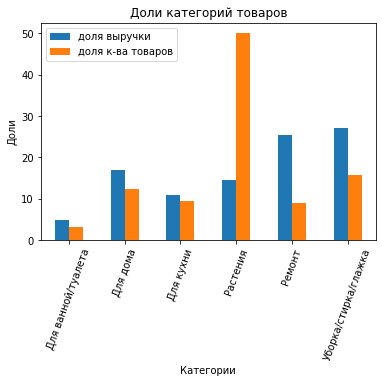

In [60]:
#построим график динамики ряда показателей по категориям товаров
cat_vir[['доля выручки', 'доля к-ва товаров']].plot.bar();
plt.title('Доли категорий товаров');
plt.xticks(rotation=70);
plt.xlabel('Категории');
plt.ylabel('Доли');

По количеству товаров первое место занмает категория 'растения' (50%). Второе и третье место занимают категории 'Уборка/стирка/глажка' и 'для дома'.

По общей выручке первое место занимает категория 'Уборка/стирка/глажка' - 38%, второе место - 'ремонт'(22%).

In [61]:
#составим профили заказов
order_describe1 = df_correct.groupby('order_id').agg({'quantity':'sum', 'price':'sum', 'product':'nunique', 'date':'max'})

#оценим среднюю стоимость одного товара в заказе
order_describe1['price/quantity'] = order_describe1['price']/order_describe1['quantity']
display(order_describe1, order_describe1.count())

order_describe1.mean()

,quantity,price,product,date,price/quantity
order_id,,,,,
12624,2,375.0,2,2019-06-02 20:00:00,187.500000
13547,3,684.0,3,2018-11-16 16:00:00,228.000000
14480,3,359.0,3,2018-10-02 11:00:00,119.666667
14481,4,600.0,4,2018-10-02 17:00:00,150.000000
14482,2,376.0,2,2018-10-07 12:00:00,188.000000
...,...,...,...,...,...
112722,1,450.0,1,2019-12-11 23:00:00,450.000000
112732,1,90.0,1,2019-11-19 19:00:00,90.000000
112767,1,38.0,1,2019-12-23 12:00:00,38.000000


quantity          3520
price             3520
product           3520
date              3520
price/quantity    3520
dtype: int64

/tmp/ipykernel_30/483065269.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  order_describe1.mean()


quantity             3.781534
price             1113.683925
product              1.567045
price/quantity     747.233995
dtype: float64

Заказы состоят в среднем из 4 единиц товара, средняя цена заказ 1114 руб., в среднем заказывают полтора наименования товара, средняя стоимость товара в заказе - 747 рублей.

count     3520.000000
mean       747.233995
std       1153.644696
min          9.000000
25%        119.000000
50%        274.205882
75%        899.000000
max      14917.000000
Name: price/quantity, dtype: float64

array([  37.        ,   55.33333333, 2999.        , 6062.08      ])

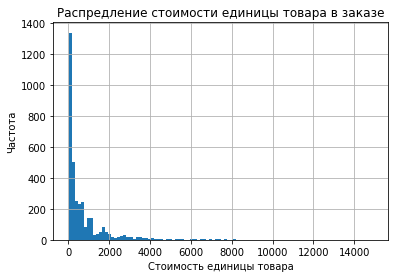

In [62]:
#посмотрим распредление стоимости единицы товара в заказе
display(order_describe1['price/quantity'].describe())
display(np.percentile(order_describe1['price/quantity'], [5, 10, 95, 99]))

order_describe1['price/quantity'].hist(bins=100)
plt.title('Распредление стоимости единицы товара в заказе');
plt.xlabel('Стоимость единицы товара');
plt.ylabel('Частота');

Средняя стоимость еденицы товара в заказе - 747 руб. Максимальная 14917 руб., минимальная - 9 руб. В 95% заказов средняя стоимость еденицы товара не более 3000 руб.

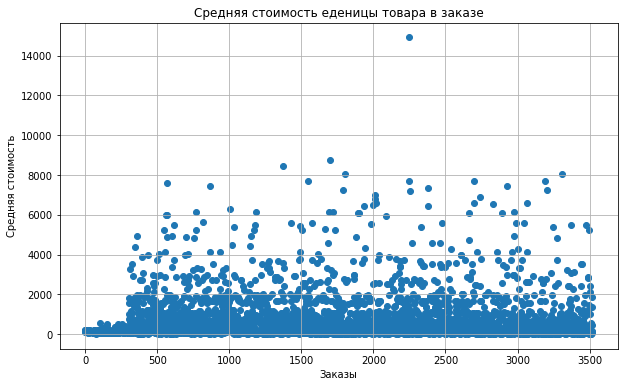

In [63]:
#построим график распределения едениц товара в заказе
x_values = pd.Series(range(0, len(order_describe1['price/quantity'])))
  
plt.figure(figsize=(10,6)) 
 
scattter_plot = plt.scatter(x_values, order_describe1['price/quantity'])  
plt.ylabel('Средняя стоимость') 
plt.xlabel('Заказы') 
plt.title('Средняя стоимость еденицы товара в заказе')
plt.grid()
plt.show()

График подтверждает выводы выше...

In [64]:
#посмотрим распредление стоимости заказа
display(order_describe1['price'].describe())
display(np.percentile(order_describe1['price'], [5, 10, 95, 99]))

count     3520.000000
mean      1113.683925
std       2057.522093
min          9.000000
25%        192.250000
50%        577.000000
75%       1237.000000
max      49432.000000
Name: price, dtype: float64

array([  58.  ,   88.  , 3749.  , 7492.96])

Средняя стоимость заказа 1113 руб. Минимальная стоимость - 9 руб., максимальная - 49432 руб. 95% заказов не превышает 3749 руб. Имеется смещение средней в большую сторону.

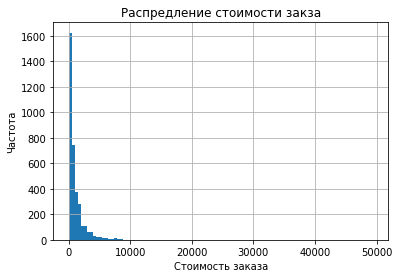

In [65]:
#построим график распределения стоимости закза
order_describe1['price'].hist(bins=100)
plt.title('Распредление стоимости закза');
plt.xlabel('Стоимость заказа');
plt.ylabel('Частота');

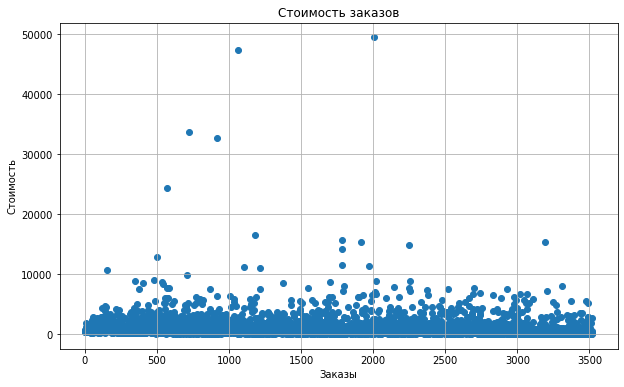

In [66]:
#построим график распределения стоимости заказов
x_values = pd.Series(range(0, len(order_describe1['price'])))
   
plt.figure(figsize=(10,6)) 
 
scattter_plot = plt.scatter(x_values, order_describe1['price'])  
plt.ylabel('Стоимость') 
plt.xlabel('Заказы') 
plt.title('Стоимость заказов')
plt.grid()
plt.show()

График подтверждает данные выше... Наибольшая плотность у облости до 4000 руб.

In [67]:
#рассмотрим самый дорогой заказ
display(order_describe1.sort_values(by='price', ascending=False).head(20))
df_correct[df_correct['order_id'] == 71668]

,quantity,price,product,date,price/quantity
order_id,,,,,
71668,334,49432.0,1,2019-06-11 07:00:00,148.000000
69830,27,47385.0,1,2019-01-15 13:00:00,1755.000000
69156,101,33680.0,6,2018-11-29 17:00:00,333.465347
69504,57,32718.0,1,2018-12-21 16:00:00,574.000000
68878,5,24370.0,1,2018-11-06 12:00:00,4874.000000
70080,3,16536.0,1,2019-02-04 06:00:00,5512.000000
71206,10,15680.0,1,2019-04-19 19:00:00,1568.000000
107812,2,15358.0,1,2019-12-31 10:00:00,7679.000000
71478,300,15300.0,1,2019-05-20 21:00:00,51.000000


,date,customer_id,order_id,product,quantity,price_product,price,category1,category
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,49432.0,Для дома,Для дома


Оставляем заказ.

In [68]:
#составим профили покупателей
customer_describe1 = df_correct.groupby('customer_id').agg({'quantity':'sum', 'price':'sum', 'order_id':'nunique', 'date':'min', 'product':'nunique'})
customer_describe2 = df_correct.groupby('customer_id').agg({'product':'count'})
customer_describe3 = df_correct.groupby('customer_id').agg({'date':'max'})

customer_describe1 = customer_describe1.merge(customer_describe2, on='customer_id')
customer_describe1 = customer_describe1.merge(customer_describe3, on='customer_id')
customer_describe1.columns = ['quantity', 'price', 'order_id', 'date_min', 'product_nunique', 'product_count', 'date_max' ]
customer_describe1['price/quantity'] = customer_describe1['price']/customer_describe1['quantity'] 
customer_describe1['price/order'] = customer_describe1['price']/customer_describe1['order_id'] 
customer_describe1['lifetime'] = customer_describe1['date_max'] - customer_describe1['date_min']
#customer_describe1['lifetime'] = customer_describe1.lifetime.apply(lambda x: x.days)
customer_describe1['frequency_order'] = customer_describe1.lifetime.apply(lambda x: x.days)/customer_describe1['order_id']

display(customer_describe1)
customer_describe1.mean()

,quantity,price,order_id,date_min,product_nunique,product_count,date_max,price/quantity,price/order,lifetime,frequency_order
customer_id,,,,,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,4,555.0,1,2019-10-16 08:00:00,4,4,2019-10-16 08:00:00,138.75,555.0,0 days 00:00:00,0.0
001cee7f-0b29-4716-b202-0042213ab038,1,442.0,1,2019-02-16 11:00:00,1,1,2019-02-16 11:00:00,442.00,442.0,0 days 00:00:00,0.0
00299f34-5385-4d13-9aea-c80b81658e1b,2,914.0,1,2019-10-14 23:00:00,1,1,2019-10-14 23:00:00,457.00,914.0,0 days 00:00:00,0.0
002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1,2019-01-27 17:00:00,1,1,2019-01-27 17:00:00,1649.00,1649.0,0 days 00:00:00,0.0
003bbd39-0000-41ff-b7f9-2ddaec152037,2,2324.0,1,2019-09-29 17:00:00,1,1,2019-09-29 17:00:00,1162.00,2324.0,0 days 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
ff601403-b094-4b86-9ac6-264d725b9277,2,1739.0,2,2019-08-16 16:00:00,2,2,2020-01-19 11:00:00,869.50,869.5,155 days 19:00:00,77.5
ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,397.0,1,2019-10-31 02:00:00,1,1,2019-10-31 02:00:00,397.00,397.0,0 days 00:00:00,0.0
ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1,389.0,1,2018-12-15 23:00:00,1,1,2018-12-15 23:00:00,389.00,389.0,0 days 00:00:00,0.0


/tmp/ipykernel_30/3380750328.py:16: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  customer_describe1.mean()


quantity                             5.480033
price                             1613.901777
order_id                             1.449156
product_nunique                      2.220255
product_count                        2.270893
price/quantity                     708.921753
price/order                       1162.844584
lifetime           79 days 23:15:30.753396459
frequency_order                     39.804521
dtype: object

В среднем каждый покупатель заказывает не более 6 единиц товара из двух наименований товара, средняя выручка с покупателя - 1613 руб., каждый покупатель в среднем делает меньше 2 заказов, средняя стоимость заказанных единиц товара - 708 руб., средняя стоимость заказа на покупателя - 1160 руб., Каждый покупатель в среднем совершает заказы в течении 80 дней, один заказ в 40 дней. 

In [69]:
#посмотрим распредление выручки с клиента
display(customer_describe1['price'].describe())
display(np.percentile(customer_describe1['price'], [5, 10, 95, 99]))

count      2429.000000
mean       1613.901777
std        4312.325700
min          15.000000
25%         396.000000
50%         831.000000
75%        1797.000000
max      159508.000000
Name: price, dtype: float64

array([ 118.  ,  164.  , 4857.4 , 9793.76])

Средняя выручка с клиента - 1613 руб., имеется смещение средней в сторону большой выручки. 95% покупателей приносят не более 4860 руб.

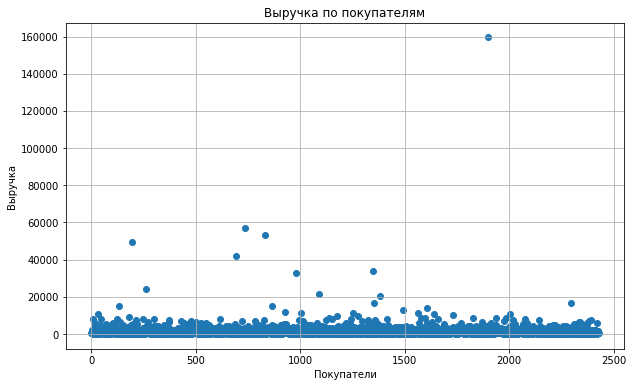

In [70]:
#
x_values = pd.Series(range(0, len(customer_describe1['price'])))
  
plt.figure(figsize=(10,6)) 
 
scattter_plot = plt.scatter(x_values, customer_describe1['price'])  
plt.ylabel('Выручка') 
plt.xlabel('Покупатели') 
plt.title('Выручка по покупателям')
plt.grid()
plt.show()

In [71]:
#посмотрим распредление выручки с клиента, без учета дорогих покупателей
display(customer_describe1[customer_describe1['price'] <= (np.percentile(customer_describe1['price'], [95])[0])]['price'].describe())
display(np.percentile(customer_describe1[customer_describe1['price'] <= (np.percentile(customer_describe1['price'], [95])[0])]['price'], [5, 10, 95, 99]))

count    2307.000000
mean     1131.405686
std      1029.970058
min        15.000000
25%       374.000000
50%       776.000000
75%      1593.000000
max      4843.000000
Name: price, dtype: float64

array([ 112.6 ,  157.  , 3412.7 , 4421.22])

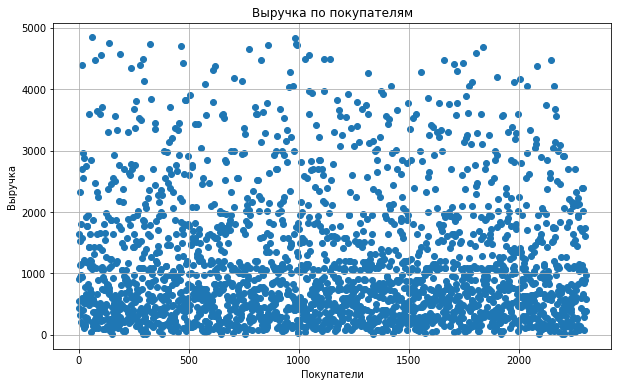

In [72]:

#построим график, без учета дорогих покупателей
x_values = pd.Series(range(0, len(customer_describe1[customer_describe1['price'] <= (np.percentile(customer_describe1['price'], [95])[0])]['price'])))
  
plt.figure(figsize=(10,6)) 
scattter_plot = plt.scatter(x_values, customer_describe1[customer_describe1['price'] <= (np.percentile(customer_describe1['price'], [95])[0])]['price'])  
plt.ylabel('Выручка') 
plt.xlabel('Покупатели') 
plt.title('Выручка по покупателям')
plt.grid()
plt.show()

После корректрировки среднее значение стало меньше, но все равно небольшое смещение осталось...

In [73]:
#помотрим распределение клиентов по частоте закзаов (исключим клиентов с разовыми заказами)
display(customer_describe1[customer_describe1['frequency_order'] > 0]['frequency_order'].describe())
display(np.percentile(customer_describe1[customer_describe1['frequency_order'] > 0]['frequency_order'], [5, 10, 95, 99]))


count    805.000000
mean     120.105814
std       50.580283
min        0.250000
25%       86.000000
50%      135.000000
75%      154.500000
max      197.500000
Name: frequency_order, dtype: float64

array([  7.13333333,  61.        , 186.5       , 195.        ])

В среднем один заказ делается в 120 дней. Это касается постоянных клиентов, сделавших более 1 заказа.

In [74]:
#оценим долю клиентов сделавших только один заказ и больше не вернувшихся в магазин
display(customer_describe1[customer_describe1['frequency_order'] == 0]['frequency_order'].count())
display(customer_describe1['frequency_order'].count())
customer_describe1[customer_describe1['frequency_order'] == 0]['frequency_order'].count()/customer_describe1['frequency_order'].count()*100

1624

2429

66.85878962536023

Довольно большая доля клиентов сделавших только один заказ и больше не вернувшихся в магазин за период исследования - почти 67%.

In [75]:
#оценим к-во клиентов делющих частые закзаы (раз в 25 дней)
display(customer_describe1[customer_describe1['frequency_order'] <= 25]['frequency_order'].count())
display(customer_describe1[customer_describe1['frequency_order'] <= 25]['frequency_order'].count()/customer_describe1['frequency_order'].count()*100)
customer_describe1[customer_describe1['frequency_order'] <= 25]['frequency_order'].count()/customer_describe1['frequency_order'].count()*100-customer_describe1[customer_describe1['frequency_order'] == 0]['frequency_order'].count()/customer_describe1['frequency_order'].count()*100

1690

69.57595718402635

2.7171675586661195

Клиентов совершающих регулярные заказы раз в 25 дней - всего 2,7%.

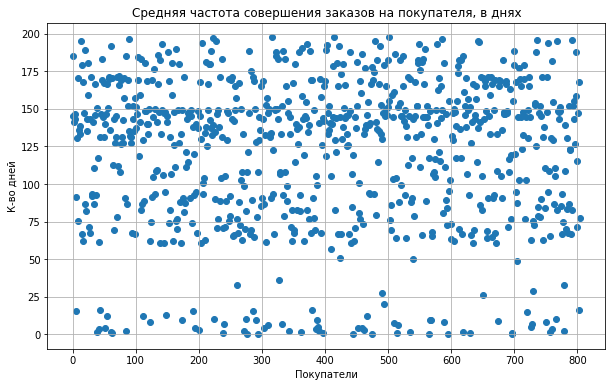

In [76]:
#построим график
x_values = pd.Series(range(0, len(customer_describe1[customer_describe1['frequency_order'] > 0]['frequency_order'])))
  
plt.figure(figsize=(10,6)) 
 
scattter_plot = plt.scatter(x_values, customer_describe1[customer_describe1['frequency_order'] > 0]['frequency_order'])  
plt.ylabel('К-во дней') 
plt.xlabel('Покупатели') 
plt.title('Средняя частота совершения заказов на покупателя, в днях')
plt.grid()
plt.show()

Покупателей можно разделить на четыре сегмента по средней частоте заказа в днях (до 25 дней, от 60 до 100 дней, от 125 до 155 дней и свыше 160 дней.

In [77]:
#посмотрим распределение стоимости заказов в среднем на покупателя, без учета покупателей сделавших дорогие заказы
display(customer_describe1[customer_describe1['price/order'] <= (np.percentile(customer_describe1['price/order'], [99.999]))[0]]['price/order'].describe())
display(np.percentile(customer_describe1[customer_describe1['price/order'] <= (np.percentile(customer_describe1['price/order'], [99.999]))[0]]['price/quantity'], [5, 10, 95, 99]))


count     2428.000000
mean      1142.964372
std       1825.115871
min         15.000000
25%        300.000000
50%        644.250000
75%       1333.312500
max      33680.000000
Name: price/order, dtype: float64

array([  39.56666667,   59.        , 2683.25      , 5204.45      ])

Стоимость заказа в среднем на покупателя 1140 руб. (без учета покупателей с экстра дорогими заказми). Средняя имеет смещение в большую сторону. 95% клиентов в среднем совершают заказ не дороже 2680 руб.

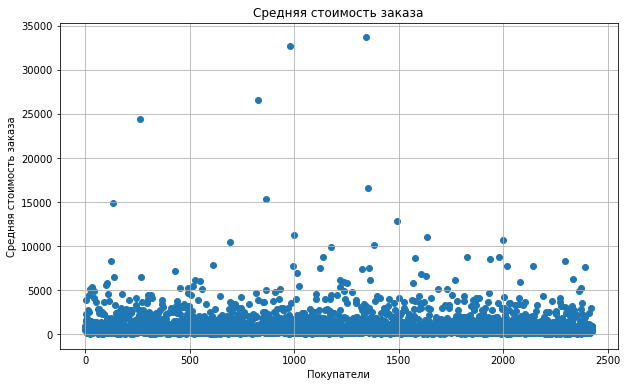

In [78]:
#построим график
x_values = pd.Series(range(0, len(customer_describe1[customer_describe1['price/order'] <= (np.percentile(customer_describe1['price/order'], [99.999]))[0]]['price/order'])))
  
plt.figure(figsize=(10,6)) 
 
scattter_plot = plt.scatter(x_values, customer_describe1[customer_describe1['price/order'] <= (np.percentile(customer_describe1['price/order'], [99.999]))[0]]['price/order'])  
plt.ylabel('Средняя стоимость заказа') 
plt.xlabel('Покупатели') 
plt.title('Средняя стоимость заказа')
plt.grid()
plt.show()

График подтверждает выводы выше...

In [79]:
#оценим количество заказов на покупателя
display(customer_describe1['order_id'].describe())
display(np.percentile(customer_describe1['order_id'], [5, 10, 95, 99]))


count    2429.000000
mean        1.449156
std         2.689519
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       126.000000
Name: order_id, dtype: float64

array([1., 1., 2., 3.])

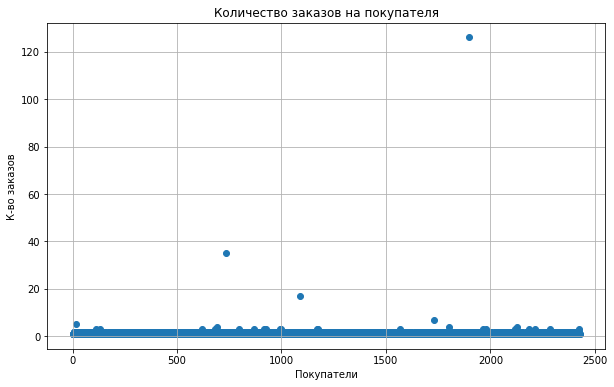

In [80]:
#построим график
x_values = pd.Series(range(0, len(customer_describe1['order_id'])))
  
plt.figure(figsize=(10,6)) 
 
scattter_plot = plt.scatter(x_values, customer_describe1['order_id'])  
plt.ylabel('К-во заказов') 
plt.xlabel('Покупатели') 
plt.title('Количество заказов на покупателя')
plt.grid()
plt.show()

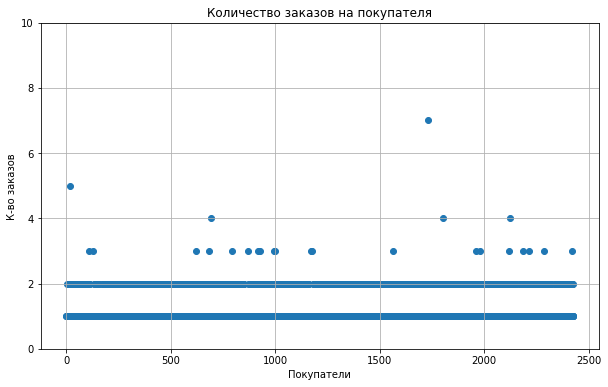

In [81]:
#без учета покупателей с большим к-вом заказов
x_values = pd.Series(range(0, len(customer_describe1['order_id'])))
  
plt.figure(figsize=(10,6)) 
 
scattter_plot = plt.scatter(x_values, customer_describe1['order_id'])  
plt.ylim(0, 10)
plt.ylabel('К-во заказов') 
plt.xlabel('Покупатели') 
plt.title('Количество заказов на покупателя')
plt.grid()
plt.show()

В среднем каждый покупатель совершает 1,5 заказа, 99% покупателей совершают не более 3 заказов.

In [82]:
#для работы с временным интервалом - переведем его в число
customer_describe1['lifetime'] = pd.to_timedelta(customer_describe1['lifetime']).dt.days
customer_describe1['lifetime']

customer_id
000d6849-084e-4d9f-ac03-37174eaf60c4      0
001cee7f-0b29-4716-b202-0042213ab038      0
00299f34-5385-4d13-9aea-c80b81658e1b      0
002d4d3a-4a59-406b-86ec-c3314357e498      0
003bbd39-0000-41ff-b7f9-2ddaec152037      0
                                       ... 
ff601403-b094-4b86-9ac6-264d725b9277    155
ffaeab76-3a8d-49ee-860f-17273b2fc8a2      0
ffb5976a-7a4d-460b-95c4-5ffaba31cb24      0
ffb80538-3fda-4351-8ea9-9d2bec58bb07      0
ffe82299-3f5b-4214-87fe-3d36ecccfac3      0
Name: lifetime, Length: 2429, dtype: int64

In [83]:
#посмотрим распределение времени жизни клиентов
display(customer_describe1['lifetime'].describe())
display(np.percentile(customer_describe1['lifetime'], [5, 10, 95, 99]))

count    2429.000000
mean       79.815150
std       127.163443
min         0.000000
25%         0.000000
50%         0.000000
75%       169.000000
max       395.000000
Name: lifetime, dtype: float64

array([  0.  ,   0.  , 339.  , 380.44])

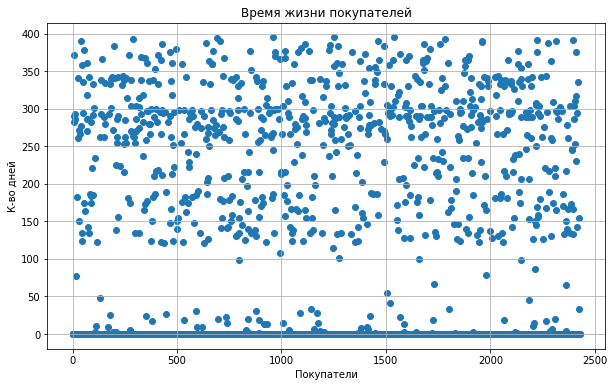

In [84]:
#построим график
x_values = pd.Series(range(0, len(customer_describe1['lifetime'])))
plt.figure(figsize=(10,6)) 
scattter_plot = plt.scatter(x_values, customer_describe1['lifetime'])  
plt.ylabel('К-во дней') 
plt.xlabel('Покупатели') 
plt.title('Время жизни покупателей')
plt.grid()
plt.show()

Основная масса клиентов делает только один заказ - их 67% (оценили выше). Время жизни клиентов в целом похожи на сегменты по средней частоте заказа в днях. Клиенты живущие до 25 дней, около 150 дней, около 250 дней и свыше 270 дней. Эти периоды стоит получше изучить и понять, что влияет на них.

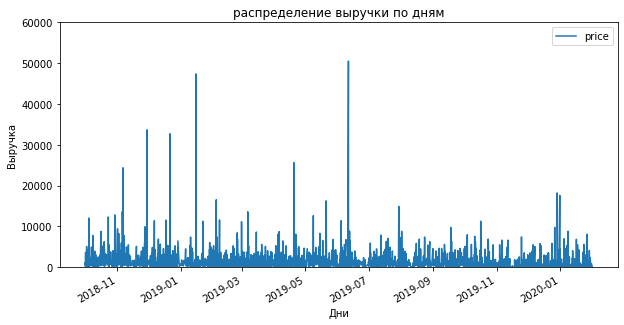

In [85]:
#посмотрим распределение выручки по дням
df_correct.pivot_table(index='date', values='price', aggfunc='sum').plot(figsize=(10,5)); 
plt.ylim(0, 60000)
plt.title('распределение выручки по дням');
plt.xlabel('Дни');
plt.ylabel('Выручка');

На графике видны дни когда были сделаны дорогие заказы. В основном они приходятся н аконец 2018 - начало 2019 года.

# Выводы по данному разделу работы:

1.	Всего были выделены 6 категорий товаров. Наибольшее количество наименований товаров в категории 'растения', наименьшее - 'для ванной/туалета'.

2.	По количеству товаров первое место занимает категория 'растения' (50%). Второе и третье место занимают категории 'Уборка/стирка/глажка' и 'для дома'.

3.	По общей выручке первое место занимает категория 'Уборка/стирка/глажка' - 38%, второе место - 'ремонт'(22%).

4.	Заказы состоят в среднем из 4 единиц товара, в 95% заказов средняя стоимость единицы товара не более 3000 руб. Средняя цена заказ 1114 руб., 95% заказов не превышают 3749 руб. В среднем заказывают два наименования товара, средняя стоимость товара в заказе - 747 рублей. 

5.	В среднем каждый покупатель заказывает 6 единиц товара из двух наименований товара, средняя выручка с покупателя - 1613 руб., 95% покупателей приносят не более 4870 руб.  Каждый покупатель в среднем делает меньше 2 заказов, 99% покупателей совершают не более 3 заказов. Средняя стоимость заказанных единиц товара - 708 руб., средняя стоимость заказа на покупателя - 1140 руб.,  95% клиентов в среднем совершают заказ не дороже 2680 руб.

6.	Доля клиентов сделавших только один заказ и больше не вернувшихся в магазин за период исследования - почти 67%.  Каждый покупатель в среднем совершает заказы в течение 80 дней, один заказ в 40 дней. Без учета покупателей с разовыми заказами, в среднем один заказ делается в 120 дней (у постоянных клиентов, сделавших более 1 заказа).

7.	Клиентов совершающих регулярные заказы раз в 25 дней - всего 2,7%.

8.	Постоянных покупателей можно разделить на четыре сегмента по средней частоте заказа в днях (один заказ до 25 дней, от 60 до 100 дней, от 125 до 155 дней и свыше 160 дней. С выделенными сегментами стоит подробнее поработать и разобраться от чего это зависит.

9.	Время жизни клиентов в целом похожи на сегменты по средней частоте заказа в днях. Клиенты - живущие до 25 дней, около 150 дней, около 250 дней и свыше 270 дней. Эти периоды стоит лучше изучить и понять, что влияет на них.


# 3. Основные вопросы исследования

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> Комментарий студента : </b>

Аномальный заказ удалила на этапе предобработки.  
   
</div>

In [86]:
#добавим допольнительные столбцы в датасет для оценки временной динамики различных показателей
df_correct['month'] = df_correct['date'].dt.month
df_correct['weekday'] = df_correct['date'].dt.weekday
df_correct['hour'] = df_correct['date'].dt.hour

df_correct['year_monht'] = df_correct['date'].dt.to_period('M')
df_correct['year_monht']

7473    2020-01
7472    2020-01
7471    2020-01
7470    2020-01
7469    2020-01
         ...   
3       2018-10
1       2018-10
5       2018-10
6       2018-10
0       2018-10
Name: year_monht, Length: 5516, dtype: period[M]

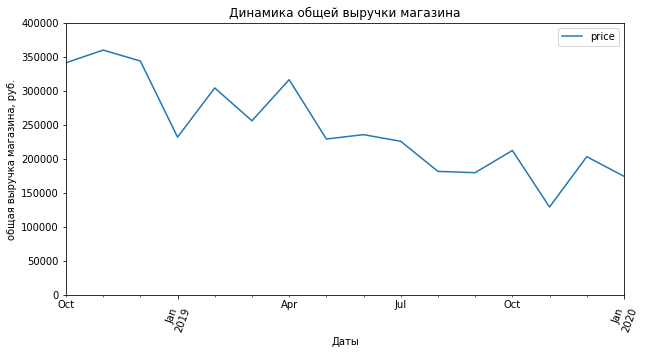

In [87]:
#оценим динамику общей выручки магазина по месяцам
df_correct.pivot_table(index='year_monht', values='price', aggfunc='sum').plot(figsize=(10,5))
plt.title('Динамика общей выручки магазина');
plt.ylim(0, 400000) 
plt.xticks(rotation=70);
plt.xlabel('Даты');
plt.ylabel('общая выручка магазина, руб.');

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ✔️ Комментарий тимлида  : </b>

Расчёт динамики выручки выполнен успешно.

</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ✏️ Рекомендация тимлида : </b>

Корректнее строить подобные графики от нуля. Так мы избегаем искажения восприятия данных, делая различия между значениями более честными и интуитивно понятными. Без нуля даже небольшие колебания могут выглядеть значительными, что может ввести в заблуждение.

---

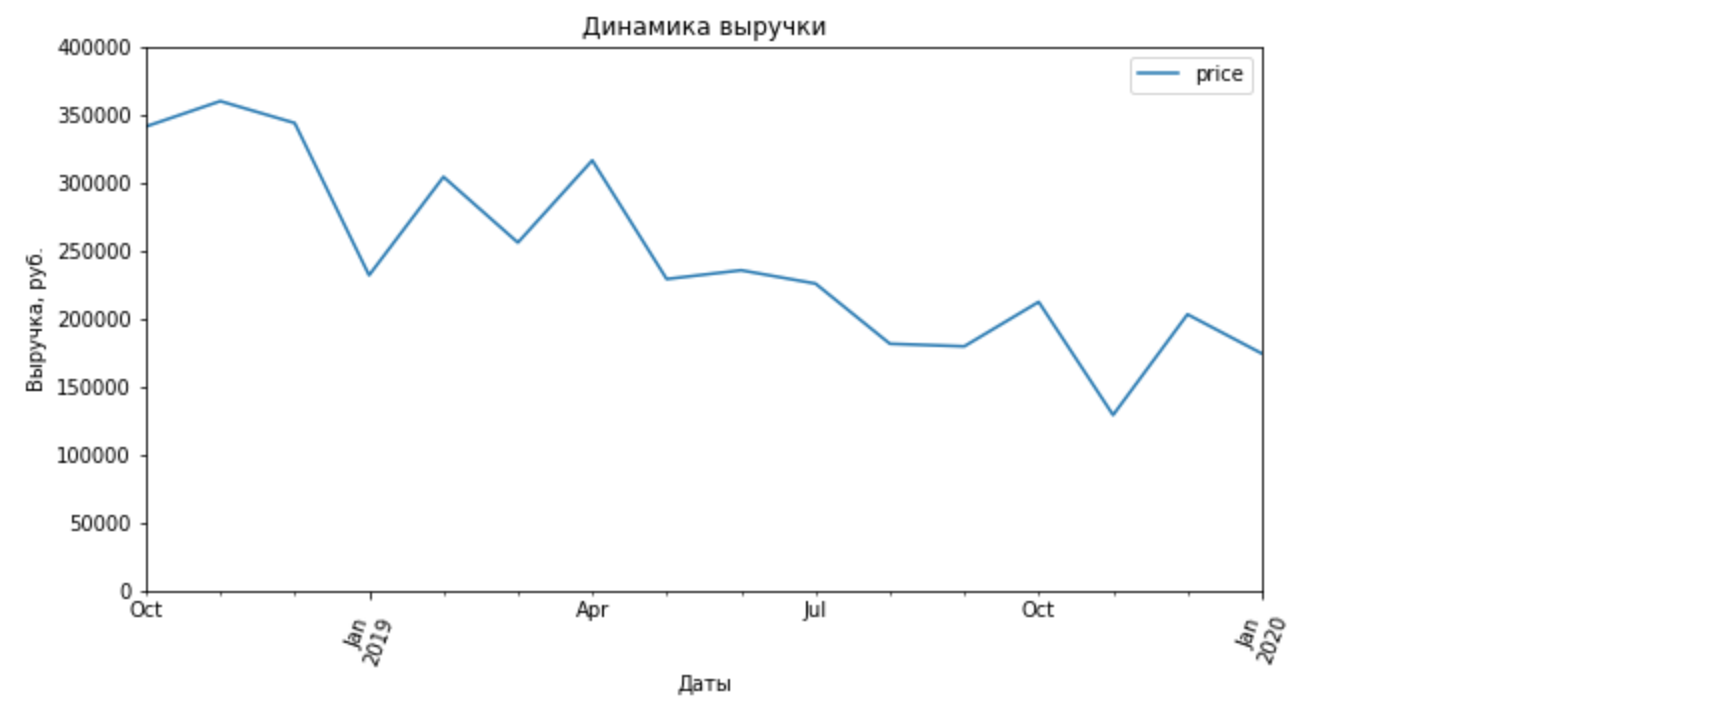
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> Комментарий студента : </b>

Графики построила от нуля. 
   
</div>

На графике видно, что общая помесячная выручка магазина с течением времени снижается.

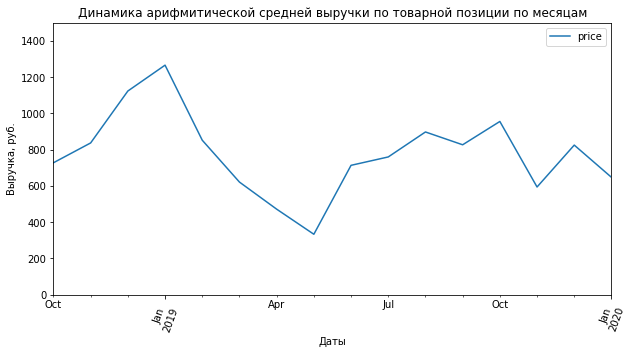

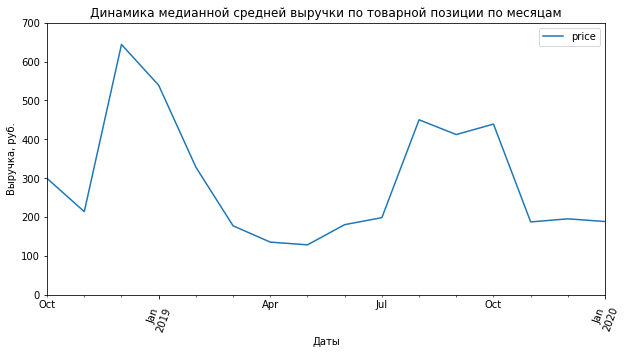

In [88]:
#оценим помесячную динамику арифметической и медианной средних выручек по товарной позиции 
df_correct.pivot_table(index='year_monht', values='price', aggfunc='mean').plot(figsize=(10,5))
plt.title('Динамика арифмитической средней выручки по товарной позиции по месяцам');
plt.ylim(0, 1500) 
plt.xticks(rotation=70);
plt.xlabel('Даты');
plt.ylabel('Выручка, руб.');

df_correct.pivot_table(index='year_monht', values='price', aggfunc='median').plot(figsize=(10,5))
plt.title('Динамика медианной средней выручки по товарной позиции по месяцам');
plt.ylim(0, 700) 
plt.xticks(rotation=70);
plt.xlabel('Даты');
plt.ylabel('Выручка, руб.');

<div id="div_id9" class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ⁉️ Критическое замечание тимлида : </b>

<s>[⬆ Ошибка №9](#1)

Формулировка непонятная, что такое "средняя выручка"? Выручка по заказу? по покупателю? по товарной позиции?

</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> Комментарий студента : </b>

Здесь я оценивала среднюю выручку по товарной позиции. 
   
</div>

В целом тренд арифметической и медианной помесячных средних выручек по товарной позиции схож. Отмечается два пика - в конце 2018 - начале 2019, а также осенью 2020 года. Наблюдается весенне-летний провал средних выручек. Т.е в это время клиенты покупают более дешевые товары.

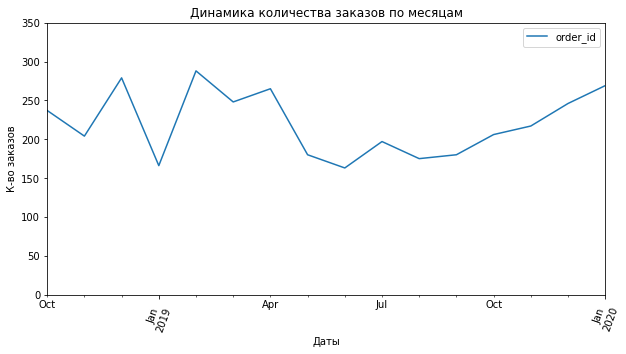

In [89]:
#оценим динамику количества заказов
df_correct.pivot_table(index='year_monht', values='order_id', aggfunc='nunique').plot(figsize=(10,5))
plt.title('Динамика количества заказов по месяцам');
plt.ylim(0, 350) 
plt.xticks(rotation=70);
plt.xlabel('Даты');
plt.ylabel('К-во заказов');

Отмечается спад заказов в январе - хотя это сильно не влияет на общую выручку, а также наблюдается большой провал к-ва заказов летом - в начале осени. Еще можно отметить, что количество закзаов сильно выросло в конце 2019 - начале 2020, но это не сказалось на увеличении общей выручки. Видимо было заказано много недорогих заказов.

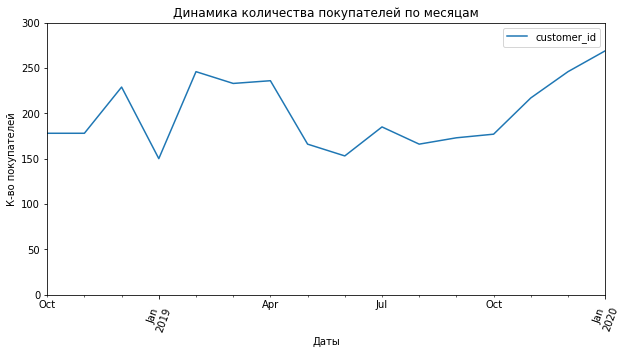

In [90]:
#оценим динамику к-ва клиентов
df_correct.pivot_table(index='year_monht', values='customer_id', aggfunc='nunique').plot(figsize=(10,5))
plt.title('Динамика количества покупателей по месяцам');
plt.ylim(0, 300) 
plt.xticks(rotation=70);
plt.xlabel('Даты');
plt.ylabel('К-во покупателей');

В целом тренд к-ва клиентов повторяет тренд к-ва заказов.

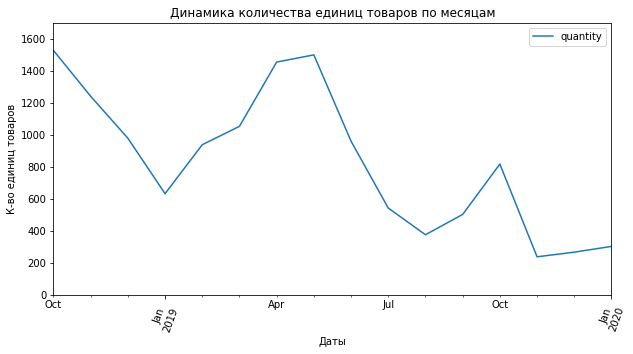

In [91]:
#оценим динамику к-ва единиц товара
df_correct.pivot_table(index='year_monht', values='quantity', aggfunc='sum').plot(figsize=(10,5))
plt.title('Динамика количества единиц товаров по месяцам');
plt.ylim(0, 1700) 
plt.xticks(rotation=70);
plt.xlabel('Даты');
plt.ylabel('К-во единиц товаров');

Видно, что несмотря на увеличение к-ва заказов в конце 2019 года (единиц товара было заказано гораздо меньше, чем в этот же период 2018 года), количество заказанных едениц товаров - снижается. Видимо поэтому снижается и общая прибыль

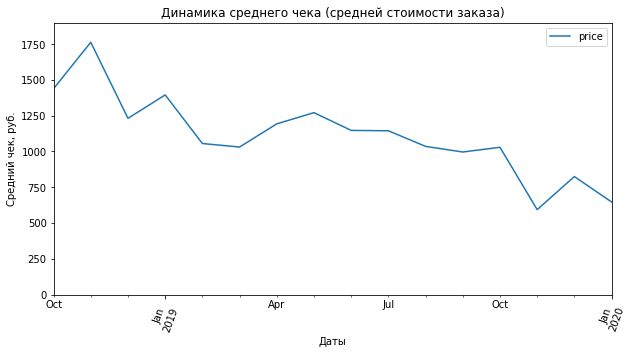

In [92]:
#оценим динамику среднего чека (средней стоимости заказа), без учета дорогого заказа
order_describe1['year_monht'] = order_describe1['date'].dt.to_period('M')
order_describe1[order_describe1['price'] <= (np.percentile(order_describe1['price'], [99.999]))[0]].pivot_table(index='year_monht', values='price', aggfunc='mean').plot(figsize=(10,5))
plt.title('Динамика среднего чека (средней стоимости заказа)');
plt.ylim(0, 1900) 
plt.xticks(rotation=70);
plt.xlabel('Даты');
plt.ylabel('Средний чек, руб.');

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ✔️ Комментарий тимлида  : </b>

Средний чек рассчитан корректно.

</div>

Тренд динамики среднего чека по месяцам, в целом повторяет тренд динаимки общей выручки. Идет постепенное снижение среднего чека (средней стоимости заказа).

customer_id,000d6849-084e-4d9f-ac03-37174eaf60c4,001cee7f-0b29-4716-b202-0042213ab038,00299f34-5385-4d13-9aea-c80b81658e1b,002d4d3a-4a59-406b-86ec-c3314357e498,003bbd39-0000-41ff-b7f9-2ddaec152037,004d24e9-4a6c-4d0e-8727-8391dfd4b43a,005ba170-45e8-42de-93f7-192481ae2659,00bd74b1-2792-47db-a2f1-680a09ac5026,00c0f92a-121a-4883-a78d-2c7b5fe187de,00c95d20-923e-4b45-88fc-53b12931d462,...,feeaebd0-2c7c-4408-a75a-0081d395888f,fef19457-5e7b-4d5d-b031-806041bc251a,ff0c73c3-6b62-4e67-8e12-bb83ed1851d5,ff31d802-dae6-484d-a3dc-c9723f1cb538,ff422162-fc4a-4b65-a0e2-17f5095ea2c6,ff601403-b094-4b86-9ac6-264d725b9277,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,ffb80538-3fda-4351-8ea9-9d2bec58bb07,ffe82299-3f5b-4214-87fe-3d36ecccfac3
year_monht,,,,,,,,,,,,,,,,,,,,,
2018-10,NaN,NaN,NaN,NaN,NaN,NaN,1199.0,937.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,749.0,NaN,NaN,NaN,NaN,NaN,389.0,NaN,NaN
2019-01,NaN,NaN,NaN,1649.0,NaN,1536.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02,NaN,442.0,NaN,NaN,NaN,NaN,NaN,NaN,134.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,959.0,...,NaN,NaN,NaN,NaN,1610.0,NaN,NaN,NaN,NaN,NaN
2019-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.0,NaN,NaN,2999.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2999.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


year_monht
2018-10    1916.230337
2018-11    2021.191011
2018-12    1500.768559
2019-01    1544.380000
2019-02    1235.991870
2019-03    1097.442060
2019-04    1339.758475
2019-05    1378.656627
2019-06    1538.032680
2019-07    1219.059459
2019-08    1091.753012
2019-09    1036.682081
2019-10    1197.966102
2019-11     593.510369
2019-12     824.737127
2020-01     646.975217
Freq: M, dtype: float64

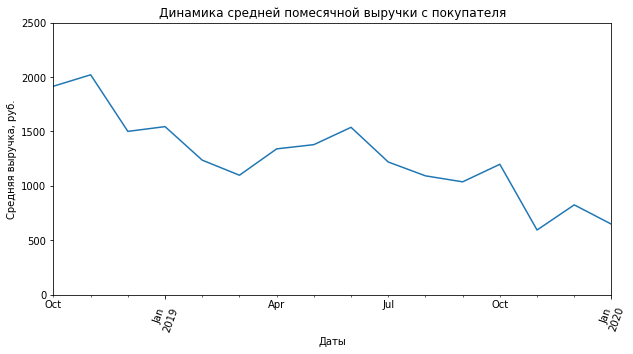

In [93]:
#оценим динамику средней помесячной выручки с покупателя
monht_viruch_customer = df_correct.pivot_table(index='year_monht', columns='customer_id', values='price', aggfunc='sum')
display(monht_viruch_customer)

monht_viruch_customer_trans = monht_viruch_customer.transpose()
monht_viruch_customer_trans1 = monht_viruch_customer_trans.mean()
display(monht_viruch_customer_trans1)

monht_viruch_customer_trans1.plot(figsize=(10,5))
plt.title('Динамика средней помесячной выручки с покупателя');
plt.ylim(0, 2500) 
plt.xticks(rotation=70);
plt.xlabel('Даты');
plt.ylabel('Средняя выручка, руб.');

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ✔️ Комментарий тимлида  : </b>

Средняя выручка на покупателя определена верно.

</div>

Как и общая выручка, как и средний чек - средняя выручка с покупателя снижается с течением времени. У магазина снижается прибыль.

Text(0, 0.5, 'выручка')

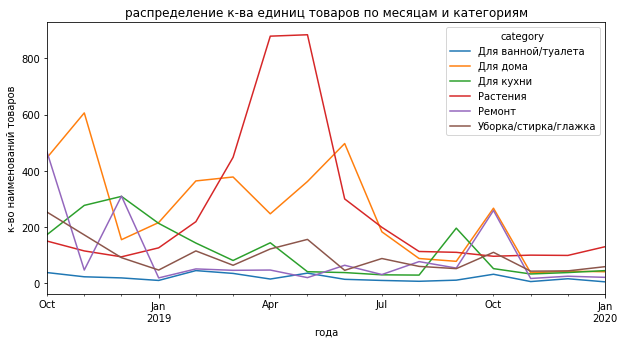

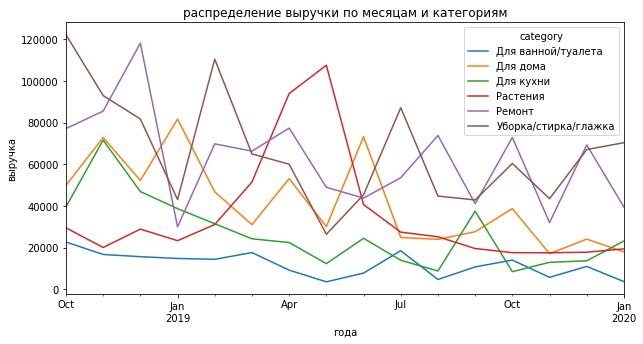

In [94]:
#построим графики
#распределение к-ва единиц товаров по месяцам и категориям
df_correct.pivot_table(index='year_monht', columns='category', values='quantity', aggfunc='sum').plot(figsize=(10,5)); 
plt.title('распределение к-ва единиц товаров по месяцам и категориям')
plt.xlabel('года')
plt.ylabel('к-во наименований товаров')

#распределение выручки по месяцам и категориям
df_correct.pivot_table(index='year_monht', columns='category', values='price', aggfunc='sum').plot(figsize=(10,5)); 
plt.title('распределение выручки по месяцам и категориям')
plt.xlabel('года')
plt.ylabel('выручка')


<div id="div_id10" class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ⁉️ Критическое замечание тимлида : </b>

<s>[⬆ Ошибка №10](#1)

Отмечал ранее. Считать количество покупателей в разрезе категорий товаров - некорректно

</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> Комментарий студента : </b>

Количество покупателей в разрезе категорий товаров удалила.
</div>

Для оценки сезонности категорий товаров, выручки по категориям товаров и к-ва покупателей по категориям мы составили графики выше. 

Видно, что по количеству заказанных единиц товара четкая сезонность наблюдается только у категории "растения". Примерно с февраля по июль заказывают экстра много товаров из этой категории. По остальным категориям такой явной сезонной зависимости нет... В категории 'для дома' - увеличивается спрос весной-летом и в октябре. В категории 'для кухни' - в апреле и в сентябре. В категории 'ремонт' - возрастает спрос в октябре.

Видно, что явной сезонной зависимости выручки по категориям нет (кроме категории 'растения').

Text(0, 0.5, 'выручка')

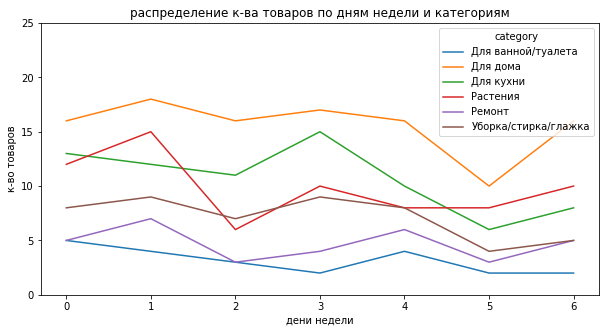

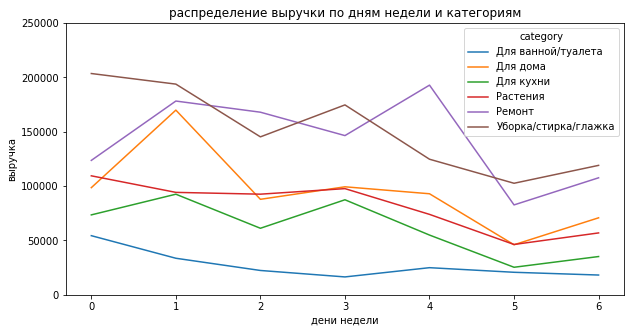

In [95]:
#построим графики
#распределение к-ва единиц товаров по дням недели и категориям
df_correct.pivot_table(index='weekday', columns='category', values='quantity', aggfunc='nunique').plot(figsize=(10,5)); 
plt.ylim(0, 25) 
plt.title('распределение к-ва товаров по дням недели и категориям')
plt.xlabel('дени недели')
plt.ylabel('к-во товаров')

#распределение выручки по дням недели и категориям
df_correct.pivot_table(index='weekday', columns='category', values='price', aggfunc='sum').plot(figsize=(10,5)); 
plt.ylim(0, 250000) 
plt.title('распределение выручки по дням недели и категориям')
plt.xlabel('дени недели')
plt.ylabel('выручка')


Выяснилось, что растения в основном покупают в понедельник. По остальным категориям нет четкой зависимости покупок по дням недели.

Товарами для ремонта преимущественно закупаются в понедельник и четверг. Для уборки в воскресенье, для дома в понедельник.

В пятницу количество единиц товаров и выручка во всех категориях снижается.  

Text(0, 0.5, 'выручка')

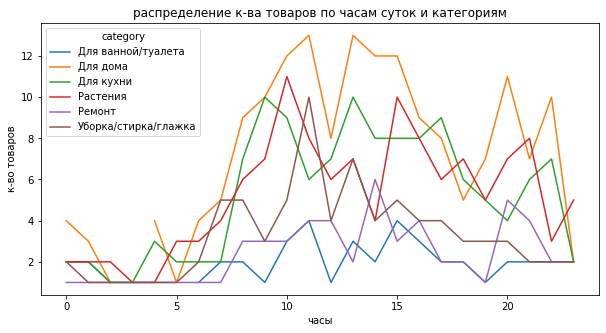

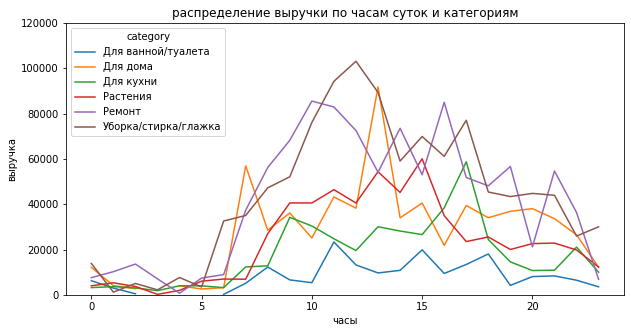

In [96]:
#построим графики
#распределение к-ва единиц товаров по часам суток и категориям
df_correct.pivot_table(index='hour', columns='category', values='quantity', aggfunc='nunique').plot(figsize=(10,5)); 
plt.title('распределение к-ва товаров по часам суток и категориям')
plt.xlabel('часы')
plt.ylabel('к-во товаров')

#распределение выручки по часам суток и категориям
df_correct.pivot_table(index='hour', columns='category', values='price', aggfunc='sum').plot(figsize=(10,5)); 
plt.ylim(0, 120000)
plt.title('распределение выручки по часам суток и категориям')
plt.xlabel('часы')
plt.ylabel('выручка')


Отмечена дневная активность покупателей. К 10-11 часам утра достигается пик покупок (и выручки), а далее идет постепенный спад покупательной активности.

**Сегментация покупателей с помощью RFM-анализа**

In [97]:
#создадим столбец с днями оформления заказов
df_correct['date_day'] = df_correct['date'].dt.to_period('D')
df_correct['date_day']

7473    2020-01-31
7472    2020-01-31
7471    2020-01-31
7470    2020-01-30
7469    2020-01-30
           ...    
3       2018-10-01
1       2018-10-01
5       2018-10-01
6       2018-10-01
0       2018-10-01
Name: date_day, Length: 5516, dtype: period[D]

In [98]:
#создадим промежуточный файл для сегментации клиентов
temp=['customer_id', 'order_id', 'date', 'price']
RFM_data=df_correct[temp]
RFM_data.shape

(5516, 4)

In [99]:
#определим максимальную дату
RFM_data['date'].max()

Timestamp('2020-01-31 15:00:00')

In [100]:
#создадим профили покупателей
NOW = dt.datetime(2020,1,31)

RFM_data['date'] = pd.to_datetime(RFM_data['date'])

RFM_table=RFM_data.groupby('customer_id').agg({'date': lambda x: (NOW - x.max()).days, # Recency
                                                'order_id': lambda x: len(x.unique()), # Frequency
                                                'price': lambda x: x.sum()})    # Monetary 

RFM_table['date'] = RFM_table['date'].astype(int)

RFM_table.rename(columns={'date': 'recency', 
                         'order_id': 'frequency',
                         'price': 'monetary_value'}, inplace=True)
RFM_table.head()

/tmp/ipykernel_30/3817537563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_data['date'] = pd.to_datetime(RFM_data['date'])


,recency,frequency,monetary_value
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,106,1,555.0
001cee7f-0b29-4716-b202-0042213ab038,348,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,108,1,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,368,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,123,1,2324.0


In [101]:
#определим кватили
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,72.0,1.0,396.0
0.50,207.0,1.0,831.0
0.75,343.0,2.0,1797.0


In [102]:
#присвоим сегмент каждому покупателю
quantiles = quantiles.to_dict()

RFM_Segment = RFM_table.copy()
# аргументы (x = значение, p = recency, monetary_value, frequency, k = квантили dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 3
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 1
    else:
        return 1
    
# аргументы (x = значение, p = recency, monetary_value, frequency, k = квантили dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 3
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

<div id="div_id11" class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ⁉️ Критическое замечание тимлида : </b>

<s>[⬆ Ошибка №11](#1)

Я говорил на созвоне, что необходимо использовать 1-3 оценку.

У нас датасет не такой большой, чтобы разбивать их по 4 оценкам.

    1 – 3 оценки для данных меньше 30 тыс. пользователей;
    1 – 4 оценки для данных от 30 тыс. до 200 тыс. пользователей;
    1 – 5 оценки для данных больше 200 тыс. пользователей.


</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> Комментарий студента : </b>

Уменьшила оценки до трех.
</div>

Каждому клиенту присвоили три сегмента, в каждом оценили его активность.
recency: 1 - спящие, 2 - давние, 3 - недавние
frequency: 1 - разово, 2 - редко, 3 - часто
monetary_value: 1 - низкая, 2 - средняя, 3 - дорогая

In [103]:
RFM_Segment['RFMClass']

customer_id
000d6849-084e-4d9f-ac03-37174eaf60c4    212
001cee7f-0b29-4716-b202-0042213ab038    112
00299f34-5385-4d13-9aea-c80b81658e1b    213
002d4d3a-4a59-406b-86ec-c3314357e498    113
003bbd39-0000-41ff-b7f9-2ddaec152037    213
                                       ... 
ff601403-b094-4b86-9ac6-264d725b9277    333
ffaeab76-3a8d-49ee-860f-17273b2fc8a2    212
ffb5976a-7a4d-460b-95c4-5ffaba31cb24    111
ffb80538-3fda-4351-8ea9-9d2bec58bb07    213
ffe82299-3f5b-4214-87fe-3d36ecccfac3    212
Name: RFMClass, Length: 2429, dtype: object

In [104]:
#проверим сколько сегментов получилось
display(len(RFM_Segment['RFMClass'].unique()))
RFM_Segment['RFMClass'].unique()

18

array(['212', '112', '213', '113', '233', '331', '333', '133', '111',
       '211', '332', '232', '131', '231', '132', '312', '313', '311'],
      dtype=object)

Клиенты разделились на 18 категории. Сгруппируем их по выгодности для магазина...

In [105]:
#определим наиболее желательных клиентов
display(RFM_Segment.query('M_Quartile == 3').sort_values('monetary_value', ascending=False)['recency'].count())
display(RFM_Segment.query('M_Quartile == 3').sort_values('monetary_value', ascending=False)['recency'].count()/df_correct['customer_id'].nunique()*100)
display(RFM_Segment.query('M_Quartile == 3').sort_values('monetary_value', ascending=False)['monetary_value'].mean())
display(RFM_Segment.query('M_Quartile == 3').sort_values('monetary_value', ascending=False)['monetary_value'].sum()/RFM_Segment.query('M_Quartile >= 3').sort_values('monetary_value', ascending=False)['frequency'].sum())
display(RFM_Segment.query('M_Quartile == 3').sort_values('monetary_value', ascending=False)['monetary_value'].sum())
display(RFM_Segment.query('M_Quartile == 3').sort_values('monetary_value', ascending=False)['monetary_value'].sum()/df_correct['price'].sum()*100)

RFM_Segment.query('F_Quartile >= 3 & M_Quartile >= 3').sort_values('monetary_value', ascending=False)


1214

49.979415397282835

2823.2510296540363

1754.0566786079837

3427426.75

87.43062185120539

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,330,126,159508.0,1,3,3,133
4d93d3f6-8b24-403b-a74b-f5173e40d7db,463,35,57278.0,1,3,3,133
58a4c3cc-504f-43ea-a74a-bae19e665552,380,2,53232.0,1,3,3,133
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,286,4,41900.0,1,3,3,133
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,91,17,21361.0,2,3,3,233
...,...,...,...,...,...,...,...
ae11fbe5-0579-4a6a-9c35-1e4cc8190451,38,2,842.0,3,3,3,333
9a9e4744-970c-4903-ad46-070512714921,77,2,839.0,2,3,3,233
fef19457-5e7b-4d5d-b031-806041bc251a,70,2,839.0,3,3,3,333


Группа наиболее желательных клиентов - не важна частота и время заказа, но важна стоимость заказа. в эту категорию вошли клиенты с дорогими и очень дорогими заказами.

Их оказалось 50%, средняя выручка 2800, средний чек 1700, выручка от этих клиентов составила 87% общей прибыли.

In [106]:
#определим клиентов покупающие разово и редко и совершающих по стоимости низкие и средние покупки
display(RFM_Segment.query('F_Quartile <=2 & M_Quartile <=2').sort_values('monetary_value', ascending=False)['recency'].count())
display(RFM_Segment.query('F_Quartile <=2 & M_Quartile <=2').sort_values('monetary_value', ascending=False)['recency'].count()/df_correct['customer_id'].nunique()*100)
display(RFM_Segment.query('F_Quartile <=2 & M_Quartile <=2').sort_values('monetary_value', ascending=False)['monetary_value'].mean())
display(RFM_Segment.query('F_Quartile <=2 & M_Quartile <=2').sort_values('monetary_value', ascending=False)['monetary_value'].sum()/RFM_Segment.query('F_Quartile <=2 & M_Quartile <=2').sort_values('monetary_value', ascending=False)['frequency'].sum())
display(RFM_Segment.query('F_Quartile <=2 & M_Quartile <=2').sort_values('monetary_value', ascending=False)['monetary_value'].sum())
display(RFM_Segment.query('F_Quartile <=2 & M_Quartile <=2').sort_values('monetary_value', ascending=False)['monetary_value'].sum()/df_correct['price'].sum()*100)

RFM_Segment.query('F_Quartile <=2 & M_Quartile <=2').sort_values('monetary_value', ascending=False)


871

35.85837793330589

384.2996555683123

384.2996555683123

334725.0

8.53853839448056

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
4816c601-0dd2-4dba-b395-f871e51dbf3d,472,1,831.0,1,1,2,112
f8126fbb-0559-4d3d-a196-dc122dc55c0a,157,1,831.0,2,1,2,212
63d48b37-11ca-46ec-b858-26cc165f7629,247,1,830.0,1,1,2,112
49d9094d-65f5-4218-83d7-7311a8e03e70,265,1,830.0,1,1,2,112
bf7fa8ff-007a-41fa-a07e-f3cfb90aee36,189,1,830.0,2,1,2,212
...,...,...,...,...,...,...,...
d5660bff-407f-463d-b2ff-e90a9ca05976,288,1,22.0,1,1,1,111
e9e94e71-4cd2-47fc-9b3f-1ec96bd2d95e,282,1,22.0,1,1,1,111
21df03ad-d9ac-47e9-a482-5372fd3e2464,302,1,22.0,1,1,1,111


Оценим группу клиентов покупающие разово и редко и совершающих по стоимости низкие и средние покупки. Ожидаемо, что прибыль от этой группы клиентов небольшая (составила 8,5% от общей прибыли магазина). Всего таких клиентов 36%. Средняя выручка равна среднему чеку и составила - 384 рубля.

In [107]:
#определим клиентов, совершающих частые покупки, но низкие и средние по стоимости
display(RFM_Segment.query('F_Quartile == 3 & M_Quartile <= 2').sort_values('monetary_value', ascending=False)['recency'].count())
display(RFM_Segment.query('F_Quartile == 3 & M_Quartile <= 2').sort_values('monetary_value', ascending=False)['recency'].count()/df_correct['customer_id'].nunique()*100)
display(RFM_Segment.query('F_Quartile == 3 & M_Quartile <= 2').sort_values('monetary_value', ascending=False)['monetary_value'].mean())
display(RFM_Segment.query('F_Quartile == 3 & M_Quartile <= 2').sort_values('monetary_value', ascending=False)['monetary_value'].sum()/RFM_Segment.query('F_Quartile >= 3 & M_Quartile <= 2').sort_values('monetary_value', ascending=False)['frequency'].sum())
display(RFM_Segment.query('F_Quartile == 3 & M_Quartile <= 2').sort_values('monetary_value', ascending=False)['monetary_value'].sum())
display(RFM_Segment.query('F_Quartile == 3 & M_Quartile <= 2').sort_values('monetary_value', ascending=False)['monetary_value'].sum()/df_correct['price'].sum()*100)

RFM_Segment.query('F_Quartile >= 3 & M_Quartile <= 2').sort_values('monetary_value', ascending=False)


344

14.162206669411281

459.3478682170542

227.3606714628297

158015.66666666666

4.030839754314064

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
44b3a10f-59f9-4677-aebf-e42d06f46ddb,84,2,826.5,2,3,2,232
5646faca-0d9f-4e97-91b1-3455dd15b3e6,69,2,825.0,3,3,2,332
04d4b824-7b31-4262-8aa0-e43772602521,2,2,824.0,3,3,2,332
ecc69147-1112-4c17-a573-cf1c3a42e83d,12,2,824.0,3,3,2,332
49f948fc-5e68-48be-ac78-db86282f9505,35,2,823.0,3,3,2,332
...,...,...,...,...,...,...,...
07bde29d-a3b1-4d72-9f37-ad5a52b07f25,6,2,112.0,3,3,1,331
2f639db6-6ce7-426b-9a6d-edbb9025463c,119,2,95.0,2,3,1,231
43ff529f-8ff0-473d-8168-4b730137a2e1,3,2,94.0,3,3,1,331


Интересно проанализировать группу клиентов совершающих частые покупки, но низкие и средние по стоимости. Интересно оценить прибыль от них, возможно ли, что прибыль от таких клиентов больше, чем в предыдущей группе?

Таких клиентов всего 14%, средняя выручка - 460 руб., средний чек 230 руб. Прибыль от них не большая - 4% от общей прибыли магазина. 

In [108]:
#определим недавних наиболее желательных клиентов
display(RFM_Segment.query('R_Quartile == 3 & F_Quartile == 3 & M_Quartile ==3').sort_values('monetary_value', ascending=False)['recency'].count())
display(RFM_Segment.query('R_Quartile == 3 & F_Quartile == 3 & M_Quartile ==3').sort_values('monetary_value', ascending=False)['recency'].count()/df_correct['customer_id'].nunique()*100)
display(RFM_Segment.query('R_Quartile == 3 & F_Quartile == 3 & M_Quartile ==3').sort_values('monetary_value', ascending=False)['monetary_value'].sum()/RFM_Segment.query('R_Quartile >= 3 & F_Quartile >= 3 & M_Quartile >=3').sort_values('monetary_value', ascending=False)['frequency'].sum())
display(RFM_Segment.query('R_Quartile == 3 & F_Quartile == 3 & M_Quartile ==3').sort_values('monetary_value', ascending=False)['monetary_value'].sum())
display(RFM_Segment.query('R_Quartile == 3 & F_Quartile == 3 & M_Quartile ==3').sort_values('monetary_value', ascending=False)['monetary_value'].sum()/df_correct['price'].sum()*100)

RFM_Segment.query('R_Quartile >= 3 & F_Quartile >= 3 & M_Quartile >=3').sort_values('monetary_value', ascending=False)

365

15.026759983532317

1277.5183789954337

932588.4166666666

23.789504823231507

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
f279d50f-a508-40b4-bde5-5cb4a1be3ad0,30,2,16557.0,3,3,3,333
ad66d870-22f5-43bc-958f-73420822586b,67,2,13731.0,3,3,3,333
b7dffbd3-810c-4125-889a-454ee093eb73,7,2,10168.0,3,3,3,333
ac250053-a236-467a-97d2-ddbb9bf4a1ba,49,2,8684.0,3,3,3,333
b16a52b7-499b-4be8-9220-19076ed22bc9,43,2,8307.0,3,3,3,333
...,...,...,...,...,...,...,...
240622a9-246f-46e8-b356-4be471d112d4,27,2,845.5,3,3,3,333
ae11fbe5-0579-4a6a-9c35-1e4cc8190451,38,2,842.0,3,3,3,333
fef19457-5e7b-4d5d-b031-806041bc251a,70,2,839.0,3,3,3,333


Это клиенты недавно совершившие покупки, часто делающие высокие по стоимости заказы. Их оказалось 15%. Они принесли 23% прибыли.

In [109]:
#определим клиентов которые на пороге оттока
display(RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('monetary_value', ascending=False)['recency'].count())
display(RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('monetary_value', ascending=False)['recency'].count()/df_correct['customer_id'].nunique()*100)
display(RFM_Segment.query('R_Quartile <= 2').sort_values('monetary_value', ascending=False)['monetary_value'].mean())
display(RFM_Segment.query('R_Quartile <= 2').sort_values('monetary_value', ascending=False)['monetary_value'].sum())
display(RFM_Segment.query('R_Quartile <= 2').sort_values('monetary_value', ascending=False)['monetary_value'].sum()/df_correct['price'].sum()*100)

RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('monetary_value', ascending=False)

1820

74.92795389048992

1580.1826007326006

2875932.333333333

73.3624875587265

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,330,126,159508.0,1,3,3,133
4d93d3f6-8b24-403b-a74b-f5173e40d7db,463,35,57278.0,1,3,3,133
58a4c3cc-504f-43ea-a74a-bae19e665552,380,2,53232.0,1,3,3,133
146cd9bf-a95c-4afb-915b-5f6684b17444,233,1,49432.0,1,1,3,113
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,286,4,41900.0,1,3,3,133
...,...,...,...,...,...,...,...
21df03ad-d9ac-47e9-a482-5372fd3e2464,302,1,22.0,1,1,1,111
f34611ba-b488-4a88-8d6b-f59a05970fc1,130,1,22.0,2,1,1,211
2b6439c9-1ae1-4785-9509-ca4348b3d39a,276,1,22.0,1,1,1,111


На пороге оттока - почти 75% клиентов. И это сказывается на прибыли магазина.

In [110]:
#Выберем среди них клиентов на котрых требуется обратить внимание в первую очередь и постараться не допустить их оттока
display(RFM_Segment.query('R_Quartile <= 2 & F_Quartile >= 3 & M_Quartile >=3').sort_values('monetary_value', ascending=False)['recency'].count())
display(RFM_Segment.query('R_Quartile <= 2 & F_Quartile >= 3 & M_Quartile >=3').sort_values('monetary_value', ascending=False)['recency'].count()/df_correct['customer_id'].nunique()*100)
display(RFM_Segment.query('R_Quartile <= 2 & F_Quartile >= 3 & M_Quartile >=3').sort_values('monetary_value', ascending=False)['monetary_value'].mean())
display(RFM_Segment.query('R_Quartile <= 2 & F_Quartile >= 3 & M_Quartile >=3').sort_values('monetary_value', ascending=False)['monetary_value'].sum())
display(RFM_Segment.query('R_Quartile <= 2 & F_Quartile >= 3 & M_Quartile >=3').sort_values('monetary_value', ascending=False)['monetary_value'].sum()/df_correct['price'].sum()*100)

RFM_Segment.query('R_Quartile <= 2 & F_Quartile >= 3 & M_Quartile >=3').sort_values('monetary_value', ascending=False)

176

7.245780156442981

4669.962121212121

821913.3333333334

20.96628143581198

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,330,126,159508.0,1,3,3,133
4d93d3f6-8b24-403b-a74b-f5173e40d7db,463,35,57278.0,1,3,3,133
58a4c3cc-504f-43ea-a74a-bae19e665552,380,2,53232.0,1,3,3,133
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,286,4,41900.0,1,3,3,133
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,91,17,21361.0,2,3,3,233
...,...,...,...,...,...,...,...
aa08d880-4085-4ee3-b99c-b9ea4e59059f,213,2,876.0,1,3,3,133
1b8ed3dd-de2d-4277-9249-bec9cfa6c8ba,86,2,862.0,2,3,3,233
86432d8d-b706-463b-bd5d-6a9e170daee3,91,2,861.0,2,3,3,233


Таких клиентов всего 7%. Их средняя выручка очень большая (4600 руб.), необходимо в первую очередь постараться вернуть этих клиентов. Для их возврата необходимо усилить таргетную рекламу и предложить индивидуальные скидки. Клиентов всего 176 человека - можно сделать персональные предложения.


In [111]:
#определим клиентов которые находятся на пороге оттока, но их привлекательность стоит на втором месте, после предыдущей группы
display(RFM_Segment[RFM_Segment['RFMClass']!='111'].query('R_Quartile <= 2 & F_Quartile <= 2 & M_Quartile <= 2').sort_values('monetary_value', ascending=False)['recency'].count())
display(RFM_Segment[RFM_Segment['RFMClass']!='111'].query('R_Quartile <= 2 & F_Quartile <= 2 & M_Quartile <= 2').sort_values('monetary_value', ascending=False)['recency'].count()/df_correct['customer_id'].nunique()*100)
display(RFM_Segment[RFM_Segment['RFMClass']!='111'].query('R_Quartile <= 2 & F_Quartile <= 2 & M_Quartile <= 2').sort_values('monetary_value', ascending=False)['monetary_value'].mean())
display(RFM_Segment[RFM_Segment['RFMClass']!='111'].query('R_Quartile <= 2 & F_Quartile <= 2 & M_Quartile <= 2').sort_values('monetary_value', ascending=False)['monetary_value'].sum())
display(RFM_Segment[RFM_Segment['RFMClass']!='111'].query('R_Quartile <= 2 & F_Quartile <= 2 & M_Quartile <= 2').sort_values('monetary_value', ascending=False)['monetary_value'].sum()/df_correct['price'].sum()*100)


RFM_Segment[RFM_Segment['RFMClass']!='111'].query('R_Quartile <= 2 & F_Quartile <= 2 & M_Quartile <= 2').sort_values('monetary_value', ascending=False)

559

23.01358583779333

481.5974955277281

269213.0

6.867385276849039

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
4816c601-0dd2-4dba-b395-f871e51dbf3d,472,1,831.0,1,1,2,112
f8126fbb-0559-4d3d-a196-dc122dc55c0a,157,1,831.0,2,1,2,212
49d9094d-65f5-4218-83d7-7311a8e03e70,265,1,830.0,1,1,2,112
bf7fa8ff-007a-41fa-a07e-f3cfb90aee36,189,1,830.0,2,1,2,212
63d48b37-11ca-46ec-b858-26cc165f7629,247,1,830.0,1,1,2,112
...,...,...,...,...,...,...,...
4ec5ae68-75a4-4c59-ac13-1b91625b2ba7,113,1,37.0,2,1,1,211
f3f12a44-8b82-4850-899f-69130c366f0f,137,1,29.0,2,1,1,211
f34611ba-b488-4a88-8d6b-f59a05970fc1,130,1,22.0,2,1,1,211


Для клиентов которые находятся на пороге оттока, но их привлекательность стоит на втором месте, после предыдущей группы - усилить таргетную рекламу и провести скидочные акции. Таких клиентов - 23%. Их необходимо побудить на покупки снова. По возможности увеличив частоту и размер покупок...

In [112]:
#определим потерянных клиентов, которым не нужно уделять много внимания
display(RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('recency',ascending=False)['recency'].count())
display(RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('recency',ascending=False)['recency'].count()/df_correct['customer_id'].nunique()*100)
display(RFM_Segment.query('R_Quartile == 1 & F_Quartile == 1 & M_Quartile == 1').sort_values('monetary_value', ascending=False)['monetary_value'].mean())
display(RFM_Segment.query('R_Quartile == 1 & F_Quartile == 1 & M_Quartile == 1').sort_values('monetary_value', ascending=False)['monetary_value'].sum())
display(RFM_Segment.query('R_Quartile == 1 & F_Quartile == 1 & M_Quartile == 1').sort_values('monetary_value', ascending=False)['monetary_value'].sum()/df_correct['price'].sum()*100)


RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('recency',ascending=False)


307

12.63894606834088

208.93159609120522

64142.0

1.6362056305886088

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
f08d9018-438e-4e96-b519-f74c0302a433,485,1,359.0,1,1,1,111
5f75c73a-1305-4079-b040-2bcb42085002,485,1,299.0,1,1,1,111
32a85453-f14d-40c2-90ba-3851498a5f3b,485,1,374.0,1,1,1,111
29a514f5-a27e-4939-85d5-874a0c3f7a2c,485,1,193.0,1,1,1,111
eee7b1fa-ba81-4049-add6-370ee5e62e72,484,1,187.0,1,1,1,111
...,...,...,...,...,...,...,...
f51e3ca2-be7b-41d5-b597-924a2bdd9c1a,211,1,147.0,1,1,1,111
3d51f616-590e-410c-90d1-0d7a9d37f46a,210,1,376.0,1,1,1,111
30daa189-a6e7-43db-b237-723060cf3ff1,210,1,285.0,1,1,1,111


Это давнишние клиенты которые совершили мало покупок на маленькую общую сумму. Их оказалось 13%. Им стоит уделить внимание в последнюю очередь.

**Разделим клиентов на три группы:**
1. Клиенты совершающие редкие/разовые покупки низкой/средней стоимости - I сегмент
2. Клиенты совершающие частые покупки низкой/средней стоимости - II сегмент
3. Клиенты совершающие покупки высокой стоимости - III сегмент

Мы хотим понять - возможно, что клиенты совершающие частые но недорогие покупки приносят ощутимую прибыль. Наша задача оценит - какая прибыль от частых, но недорогих покупок. Сколько таких клиентов? И к какой из крайних групп эта группа ближе. 

In [113]:
RFM_Segment_c = RFM_Segment
RFM_Segment_c['customer_id1'] = RFM_Segment_c.index
RFM_Segment1 = RFM_Segment_c[['customer_id1', 'RFMClass']]
display(RFM_Segment1)

df_correct = df_correct.merge(RFM_Segment1, left_on='customer_id', right_on='customer_id1')
df_correct['RFMClass']

,customer_id1,RFMClass
customer_id,,
000d6849-084e-4d9f-ac03-37174eaf60c4,000d6849-084e-4d9f-ac03-37174eaf60c4,212
001cee7f-0b29-4716-b202-0042213ab038,001cee7f-0b29-4716-b202-0042213ab038,112
00299f34-5385-4d13-9aea-c80b81658e1b,00299f34-5385-4d13-9aea-c80b81658e1b,213
002d4d3a-4a59-406b-86ec-c3314357e498,002d4d3a-4a59-406b-86ec-c3314357e498,113
003bbd39-0000-41ff-b7f9-2ddaec152037,003bbd39-0000-41ff-b7f9-2ddaec152037,213
...,...,...
ff601403-b094-4b86-9ac6-264d725b9277,ff601403-b094-4b86-9ac6-264d725b9277,333
ffaeab76-3a8d-49ee-860f-17273b2fc8a2,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,212
ffb5976a-7a4d-460b-95c4-5ffaba31cb24,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,111


0       331
1       331
2       332
3       332
4       333
       ... 
5511    113
5512    113
5513    113
5514    113
5515    113
Name: RFMClass, Length: 5516, dtype: object

In [114]:
# Cоздадим список с сегментами клиентов
list_customer = {
    'I сегмент': ['212', '112', '111', '211', '311', '312'],
    'II сегмент':['331', '332', '232', '131', '231', '132'],
    'III сегмент':['213', '113', '233', '333', '133', '313']
}

In [115]:
# Напишем функцию которая вернет категорию по значению ‘RFMClass’.
def categor_customer(RFMClass):

    for cat_cust, items_RFMClasss in list_customer.items():
        for item in items_RFMClasss:
            if item in RFMClass:
                return cat_cust
    return cat_cust


III сегмент    3552
I сегмент      1243
II сегмент      721
Name: categor_customer, dtype: int64

Text(0, 0.5, 'К-во товаров')

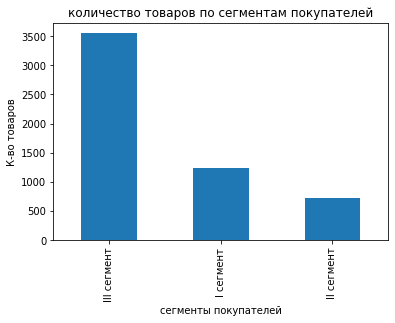

In [116]:
#добавим столбец для категорий товаров
df_correct['categor_customer'] = df_correct['RFMClass'].apply(categor_customer)
display(df_correct['categor_customer'].value_counts())
df_correct['categor_customer'].count()

df_correct['categor_customer'].value_counts().plot.bar()
plt.title('количество товаров по сегментам покупателей')
plt.xlabel('сегменты покупателей')
plt.ylabel('К-во товаров')

Наибольшее к-во категорий товаров в III сегменте, наименьшее во II сегменте.

In [117]:
df_correct[df_correct['categor_customer'] == 'III сегмент']['RFMClass'].unique()

array(['333', '313', '233', '213', '113', '133'], dtype=object)

In [118]:
#добавим в промежуточный файл категории покупателей
customer_cegment = df_correct.groupby('customer_id').agg({'categor_customer':'min'})
RFM_Segment_c['mean_chek'] = RFM_Segment_c['monetary_value']/RFM_Segment['frequency']
RFM_Segment_c = RFM_Segment_c.merge(customer_cegment, left_on = 'customer_id1', right_on = 'customer_id')
RFM_Segment_c = RFM_Segment_c.set_index('customer_id1')
display(RFM_Segment_c)


,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,mean_chek,categor_customer
customer_id1,,,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,106,1,555.0,2,1,2,212,555.0,I сегмент
001cee7f-0b29-4716-b202-0042213ab038,348,1,442.0,1,1,2,112,442.0,I сегмент
00299f34-5385-4d13-9aea-c80b81658e1b,108,1,914.0,2,1,3,213,914.0,III сегмент
002d4d3a-4a59-406b-86ec-c3314357e498,368,1,1649.0,1,1,3,113,1649.0,III сегмент
003bbd39-0000-41ff-b7f9-2ddaec152037,123,1,2324.0,2,1,3,213,2324.0,III сегмент
...,...,...,...,...,...,...,...,...,...
ff601403-b094-4b86-9ac6-264d725b9277,11,2,1739.0,3,3,3,333,869.5,III сегмент
ffaeab76-3a8d-49ee-860f-17273b2fc8a2,91,1,397.0,2,1,2,212,397.0,I сегмент
ffb5976a-7a4d-460b-95c4-5ffaba31cb24,411,1,389.0,1,1,1,111,389.0,I сегмент


III сегмент    1214
I сегмент       871
II сегмент      344
Name: categor_customer, dtype: int64

Text(0, 0.5, 'К-во покупателей')

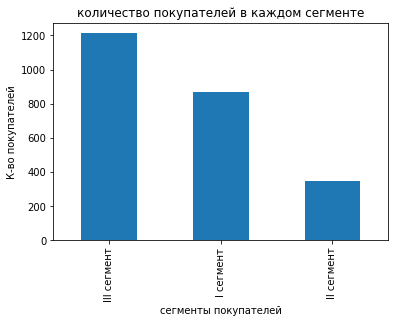

In [119]:
#оценим количество покупателей в каждом сегменте
display(RFM_Segment_c['categor_customer'].value_counts())

RFM_Segment_c['categor_customer'].value_counts().plot.bar()
plt.title('количество покупателей в каждом сегменте')
plt.xlabel('сегменты покупателей')
plt.ylabel('К-во покупателей')

Наибольшее к-во покупателей в III сегменте, наименьшее во I сегменте...

,frequency
categor_customer,
I сегмент,871
II сегмент,695
III сегмент,1954


Text(0, 0.5, 'К-во заказов')

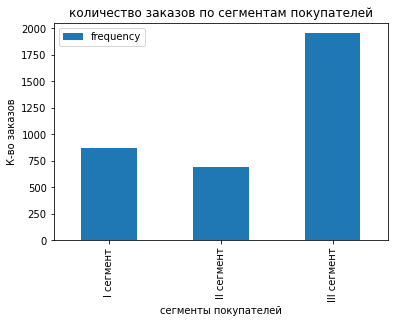

In [120]:
#оценим количество заказов по сегментам покупателей
display(RFM_Segment_c.groupby('categor_customer').agg({'frequency':'sum'}))
RFM_Segment_c.groupby('categor_customer').agg({'frequency':'sum'}).plot.bar()
plt.title('количество заказов по сегментам покупателей')
plt.xlabel('сегменты покупателей')
plt.ylabel('К-во заказов')

In [121]:
#средний чек по сегментам
display(RFM_Segment_c.groupby('categor_customer').agg({'mean_chek':'mean'}))
display(RFM_Segment_c.groupby('categor_customer').agg({'monetary_value':'mean'}))
display(RFM_Segment_c.groupby('categor_customer').agg({'monetary_value':'sum'}))



,mean_chek
categor_customer,
I сегмент,384.299656
II сегмент,228.043120
III сегмент,1986.307794


,monetary_value
categor_customer,
I сегмент,384.299656
II сегмент,459.347868
III сегмент,2823.251030


,monetary_value
categor_customer,
I сегмент,3.347250e+05
II сегмент,1.580157e+05
III сегмент,3.427427e+06


К-во заказов, средний чек, общая выручка максимальны в III сегменте, а минимальны во II сегменте.
А вот средняя выручка на покупателя минимальна в I сегменте.

In [122]:
#оценим к-во товаров, заказов, наименований товара, общую выручку и к-во клиентов по категориям товара и сегментам покупателей.
display(df_correct.pivot_table(index='categor_customer', columns='category', values='quantity', aggfunc='sum'))
display(df_correct.pivot_table(index='categor_customer', columns='category', values='order_id', aggfunc='nunique'))
display(df_correct.pivot_table(index='categor_customer', columns='category', values='product', aggfunc='nunique'))
display(df_correct.pivot_table(index='categor_customer', columns='category', values='price', aggfunc='sum'))
display(df_correct.pivot_table(index='categor_customer', columns='category', values='customer_id', aggfunc='nunique'))


category,Для ванной/туалета,Для дома,Для кухни,Растения,Ремонт,Уборка/стирка/глажка
categor_customer,,,,,,
I сегмент,45,1037,320,850,174,244
II сегмент,23,226,81,377,39,143
III сегмент,254,2746,1441,2835,1341,1135


category,Для ванной/туалета,Для дома,Для кухни,Растения,Ремонт,Уборка/стирка/глажка
categor_customer,,,,,,
I сегмент,30,175,125,296,71,182
II сегмент,20,125,79,314,19,139
III сегмент,122,274,259,447,398,500


category,Для ванной/туалета,Для дома,Для кухни,Растения,Ремонт,Уборка/стирка/глажка
categor_customer,,,,,,
I сегмент,18,139,113,352,38,124
II сегмент,18,86,59,200,12,88
III сегмент,77,242,232,754,156,318


category,Для ванной/туалета,Для дома,Для кухни,Растения,Ремонт,Уборка/стирка/глажка
categor_customer,,,,,,
I сегмент,11098.0,53432.000000,46959.0,106963.000000,34435.000000,81838.000000
II сегмент,6519.0,24628.500000,15793.0,50481.166667,8601.000000,51993.000000
III сегмент,173042.0,587310.333333,367350.0,413597.166667,956348.583333,929778.666667


category,Для ванной/туалета,Для дома,Для кухни,Растения,Ремонт,Уборка/стирка/глажка
categor_customer,,,,,,
I сегмент,30,175,125,296,71,182
II сегмент,19,102,70,221,17,121
III сегмент,103,240,222,372,334,378


Text(0, 0.5, 'К-во покупателей')

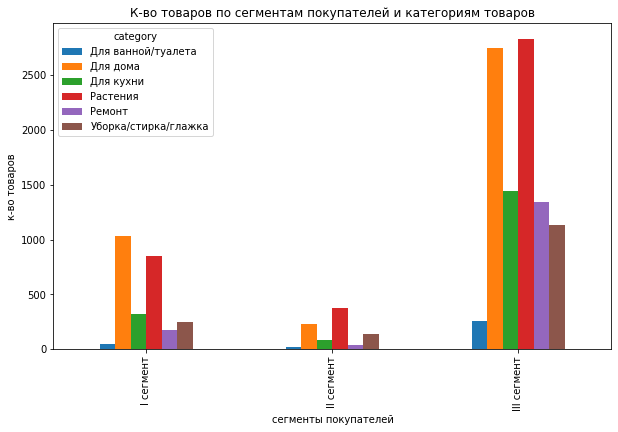

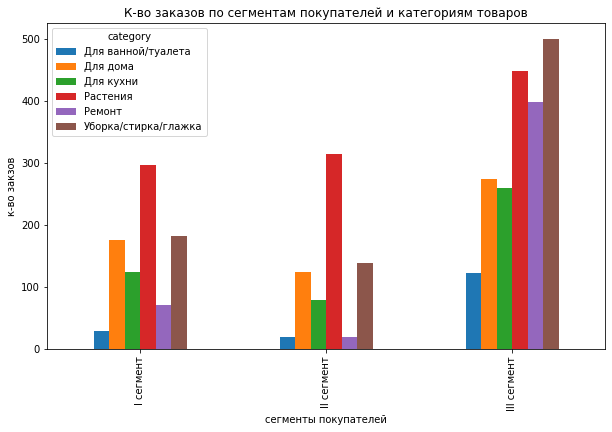

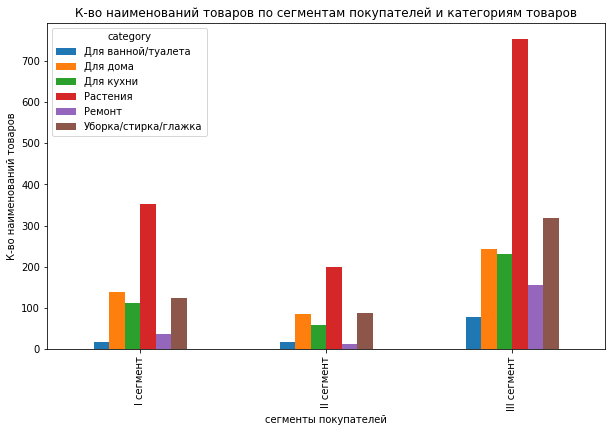

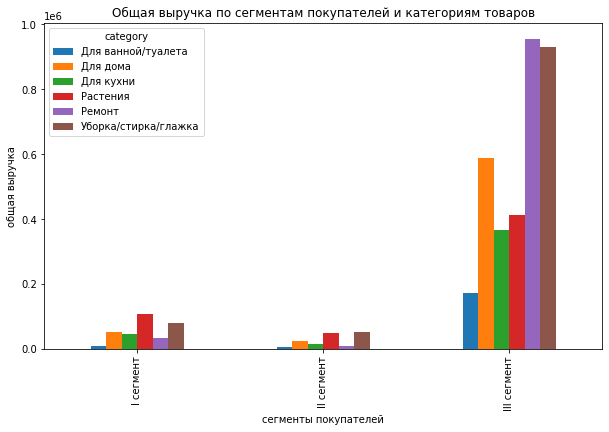

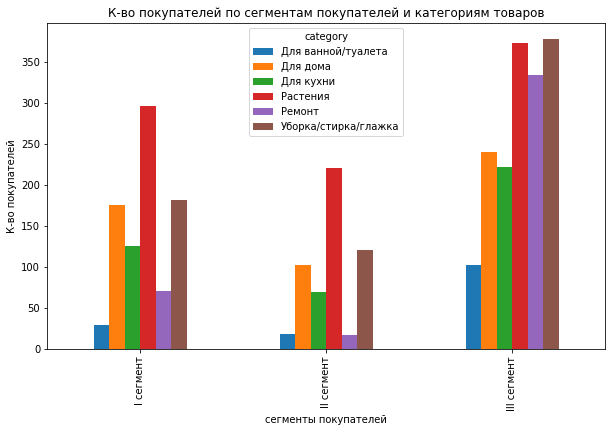

In [123]:
#построим графики
df_correct.pivot_table(index='categor_customer', columns='category', values='quantity', aggfunc='sum').plot.bar(figsize=(10,6))
plt.title('К-во товаров по сегментам покупателей и категориям товаров')
plt.xlabel('сегменты покупателей')
plt.ylabel('к-во товаров')

df_correct.pivot_table(index='categor_customer', columns='category', values='order_id', aggfunc='nunique').plot.bar(figsize=(10,6))
plt.title('К-во заказов по сегментам покупателей и категориям товаров')
plt.xlabel('сегменты покупателей')
plt.ylabel('к-во закзов')

df_correct.pivot_table(index='categor_customer', columns='category', values='product', aggfunc='nunique').plot.bar(figsize=(10,6))
plt.title('К-во наименований товаров по сегментам покупателей и категориям товаров')
plt.xlabel('сегменты покупателей')
plt.ylabel('К-во наименований товаров')

df_correct.pivot_table(index='categor_customer', columns='category', values='price', aggfunc='sum').plot.bar(figsize=(10,6))
plt.title('Общая выручка по сегментам покупателей и категориям товаров')
plt.xlabel('сегменты покупателей')
plt.ylabel('общая выручка')

df_correct.pivot_table(index='categor_customer', columns='category', values='customer_id', aggfunc='nunique').plot.bar(figsize=(10,6))
plt.title('К-во покупателей по сегментам покупателей и категориям товаров')
plt.xlabel('сегменты покупателей')
plt.ylabel('К-во покупателей')


По к-ву заказанных единиц товара во всех сегментах превалируют категории для дома и растения. Во втором сегменте значительную часть занимает  категория уборка/стирка/глажка.

По к-ву заказов в I и II сегменте соотношение категорий похоже - превалирует категория растения. А в III сегменте превалируют три категории растения, ремонт, уборка/стрика/глажка.

По к-ву наименований товара в I и II сегменте соотношение категорий похоже - превалирует категория заказы. А в III сегменте превалируют так же растения, а так же значимы - ремонт и уборка/стрика/глажка.

В I и II сегменте общая выручка больше по категории растения и уборка/стрика/глажка. В III сегменте общая выручка больше в категориях ремонт и уборка/стрика/глажка. На третьем месте во всех сегментах общая выручка по категории 'для дома'.

По к-ву покупателей в I и II сегменте соотношение категорий похоже - превалирует категория растения. А в III сегменте превалируют три категории растения, ремонт, уборка/стрика/глажка.


In [124]:
#выделим топ-10 популярных товаров в каждом сегменте
df_correct[df_correct['categor_customer'] == 'I сегмент']['product'].value_counts().head(10)

пеларгония розебудная prins nikolai укорененный черенок                                                    16
пеларгония розебудная red pandora укорененный черенок                                                      15
сушилка для белья настенная zalger prima 510-720 веревочная 7 линий 25 м                                   13
пеларгония зональная диам. 12 см сиреневый полумахровый                                                    13
тележка багажная delta тбр-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас россия    11
пеларгония зональная махровая лососевая                                                                    11
герань домашняя (пеларгония зональная) цветущая d12, h25-30, сиреневый, простая                            10
тележка багажная delta тбр-20 черный с серым грузоподъемность 25 кг сумка 50 кг каркас россия               9
пеларгония розебудная margaretha укорененный черенок                                                        9
пеларгония

In [125]:
#выделим топ-10 популярных товаров в каждом сегменте
df_correct[df_correct['categor_customer'] == 'II сегмент']['product'].value_counts().head(10)

пеларгония розебудная red pandora укорененный черенок                            25
пеларгония зональная ринго вайт d-7 см h-10 см укорененный черенок               17
пеларгония розебудная prins nikolai укорененный черенок                           8
пеларгония зональная мультиблум скарлет ай d-7 см h-10 см укорененный черенок     7
пеларгония розебудная queen ingrid укорененный черенок                            7
пеларгония розебудная margaretha укорененный черенок                              6
сушилка для белья потолочная лиана 2,0 м 1703009                                  6
пеларгония розебудная mary укорененный черенок                                    6
чехол для костюма 60х110 см rozenbal r261016                                      5
искусственная композиция из цветов пластиковая ромашка мини розовая               5
Name: product, dtype: int64

In [126]:
#выделим топ-10 популярных товаров в каждом сегменте
df_correct[df_correct['categor_customer'] == 'III сегмент']['product'].value_counts().head(10)

сумка-тележка 2-х колесная gimi argo синяя                     47
пеларгония зональная диам. 12 см сиреневый полумахровый        37
пеларгония розебудная prins nikolai укорененный черенок        32
пеларгония розебудная mary укорененный черенок                 26
пеларгония розебудная red pandora укорененный черенок          26
пеларгония зональная диам. 12 см коралловая полумахровая       18
пеларгония зональная диам. 12 см темнорозовая полумахровая     17
пеларгония розебудная margaretha укорененный черенок           16
пеларгония розебудная queen ingrid укорененный черенок         15
однолетнее растение петуния махровая в кассете 4 шт, россия    15
Name: product, dtype: int64

В первом сегменте топ-товары из категорий растения, ремонт и уборка/стирка/глажка.
Во втором сегменте - растения и уборка/стирка/глажка.
В третьем сегменте -  растения и ремонт.

Text(0, 0.5, 'выручка')

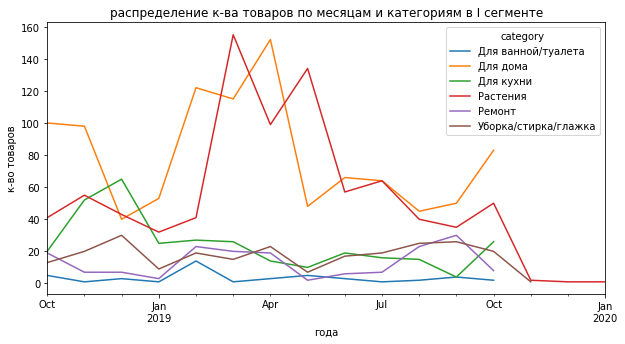

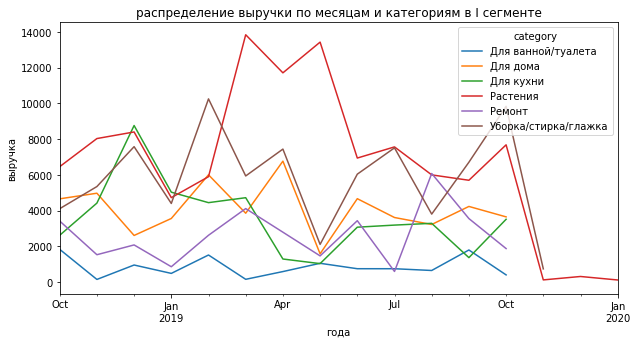

In [127]:
#построим графики для оценки сезонности категорий товаров  в первом сегменте
df_correct[df_correct['categor_customer'] == 'I сегмент'].pivot_table(index='year_monht', columns='category', values='quantity', aggfunc='sum').plot(figsize=(10,5)); 
plt.title('распределение к-ва товаров по месяцам и категориям в I сегменте')
plt.xlabel('года')
plt.ylabel('к-во товаров')

df_correct[df_correct['categor_customer'] == 'I сегмент'].pivot_table(index='year_monht', columns='category', values='price', aggfunc='sum').plot(figsize=(10,5)); 
plt.title('распределение выручки по месяцам и категориям в I сегменте')
plt.xlabel('года')
plt.ylabel('выручка')


В I сегменте количество проданных товаров для дома и растения имеет выраженную сезонность - с февраля по май - для дома, а с марта по июнь - растения, далее идет спад и в сентябре опять повышение к-ва заказов в этих категориях.

Выручка по категории растения имеет четкую сезонность - с февраля по май - пик. В мае почти по всем категориям спад выручки. По остальным категориям явная сезонность не обнаружена.


Text(0, 0.5, 'выручка')

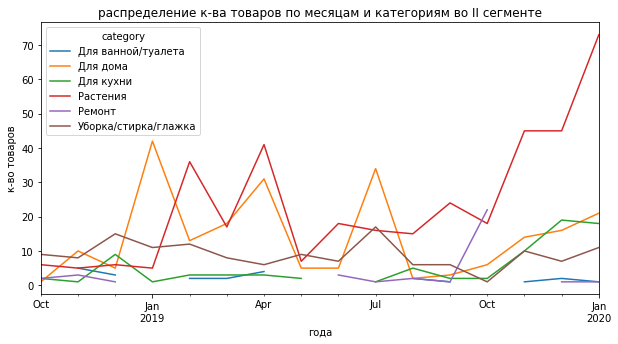

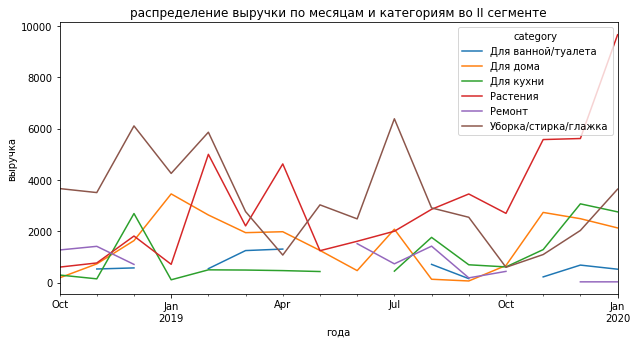

In [147]:
#построим графики для оценки сезонности категорий товаров  во втором сегменте
df_correct[df_correct['categor_customer'] == 'II сегмент'].pivot_table(index='year_monht', columns='category', values='quantity', aggfunc='sum').plot(figsize=(10,5)); 
plt.title('распределение к-ва товаров по месяцам и категориям во II сегменте')
plt.xlabel('года')
plt.ylabel('к-во товаров')

df_correct[df_correct['categor_customer'] == 'II сегмент'].pivot_table(index='year_monht', columns='category', values='price', aggfunc='sum').plot(figsize=(10,5)); 
plt.title('распределение выручки по месяцам и категориям во II сегменте')
plt.xlabel('года')
plt.ylabel('выручка')


Во II сегменте количество проданных товаров для дома и растения так же имеет выраженную сезонность - с января по май - для дома, а с февраля по май - растения, далее идет спад и с октября опять повышение к-ва заказов в этих категориях.

Выручка по категории растения и для дома имеет тренды похожии на к-во заказов в этом сегменте - пик в конце зимы - начале весны, потом спад и снова пик в середине осени. 
Интересная сезонность по категории уборка/стирка/глажка - пик выручки с ноября по февраль, далее спад и в мае снова подъем выручки до июля, далее спад и к концу года опять небольшой подъем. 

Text(0, 0.5, 'выручка')

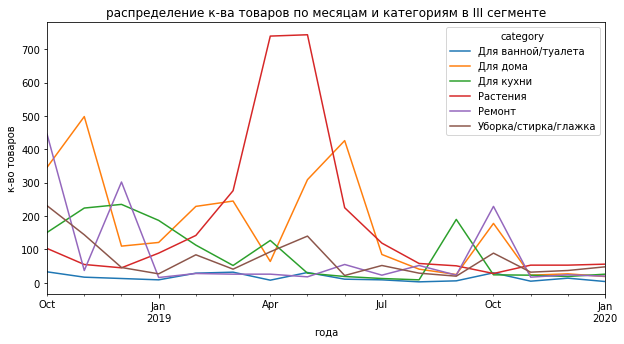

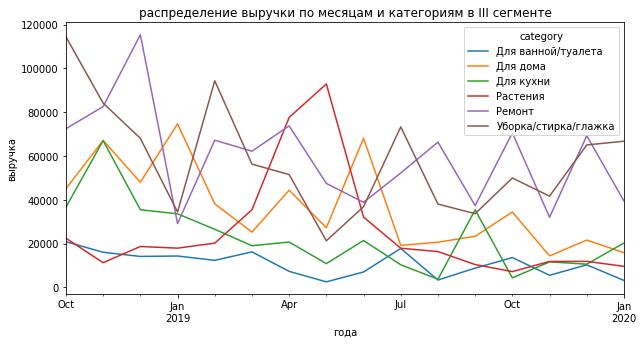

In [148]:
#построим графики для оценки сезонности категорий товаров  в третьем сегменте
df_correct[df_correct['categor_customer'] == 'III сегмент'].pivot_table(index='year_monht', columns='category', values='quantity', aggfunc='sum').plot(figsize=(10,5)); 
plt.title('распределение к-ва товаров по месяцам и категориям в III сегменте')
plt.xlabel('года')
plt.ylabel('к-во товаров')

df_correct[df_correct['categor_customer'] == 'III сегмент'].pivot_table(index='year_monht', columns='category', values='price', aggfunc='sum').plot(figsize=(10,5)); 
plt.title('распределение выручки по месяцам и категориям в III сегменте')
plt.xlabel('года')
plt.ylabel('выручка')


В III группе имеется сезонность к-ва купленных товаров по категориям - растения, дом, кухня.

По общей выручке явная сезонность только по категории растения.

Полученные данные можно использовать для создания таргетной рекламы...

**Выводы по данному разделу**


1. У магазина снижается прибыль. Общая помесячная выручка магазина с течением времени снижается. Идет постепенное снижение и среднего чека (средней стоимости заказа). Средняя выручка с покупателя снижается с течением времени. 

2. Отмечается два пика помесячных средних выручек по товарной позиции - в конце 2018 - начале 2019, а также осенью 2020 года. Наблюдается весенне-летний провал средних выручек. В этот период клиенты заказывают более дешевые по стоимости товары.

3. Отмечается спад заказов в январе - хотя это сильно не влияет на общую выручку, а также наблюдается большой провал к-ва заказов летом - в начале осени. Еще можно отметить, что количество заказов сильно выросло в конце 2019 - начале 2020, но это не сказалось на увеличении общей выручки. Видимо было заказано много недорогих заказов.

4. Несмотря на увеличение к-ва заказов в конце 2019 года, количество заказанных единиц товаров - снижается. Видимо поэтому снижается и общая прибыль

5. По количеству заказанных единиц товара четкая сезонность наблюдается только у категории "растения". Примерно с февраля по июль заказывают экстра много товаров из этой категории. По остальным категориям такой явной сезонной зависимости нет... В категории 'для дома' - увеличивается спрос весной-летом и в октябре. В категории 'для кухни' - в апреле и в сентябре. В категории 'ремонт' - возрастает спрос в октябре.

6. Растения в основном покупают в понедельник. По остальным категориям нет четкой зависимости покупок по дням недели. Товарами для ремонта преимущественно закупаются в понедельник и четверг. Для уборки в воскресенье, для дома в понедельник. В пятницу количество покупок и выручка во всех категориях снижается. 

7. Клиенты, недавно совершившие покупки, часто делающие высокие по стоимости заказы - 15%. Они принесли 23% прибыли.

8. На пороге оттока - почти 75% клиентов. И это сказывается на прибыли магазина.

9. Мы определили список клиентов на которых требуется обратить внимание в первую очередь и постараться не допустить их оттока: всего 7%. Их средняя выручка очень большая (4600 руб.), необходимо в первую очередь постараться вернуть этих клиентов. Для их возврата необходимо усилить таргетную рекламу и предложить индивидуальные скидки. Клиентов всего 176 человека - можно сделать персональные предложения.

10. Для клиентов которые находятся на пороге оттока, но их привлекательность стоит на втором месте, после предыдущей группы необходимо усилить таргетную рекламу и провести скидочные акции. Таких клиентов - 23%. Их необходимо побудить на покупки снова. По возможности увеличив частоту и размер покупок...
 
11. Давнишние клиенты которые совершили мало покупок на маленькую общую сумму. Их оказалось 13%. Им стоит уделить внимание в последнюю очередь.

12. Мы разделили клиентов на три группы:
    1.	Клиенты совершающие редкие/разовые покупки низкой/средней стоимости - I сегмент. Прибыль от этой группы клиентов небольшая (составила 8,5% от общей прибыли магазина). Всего таких клиентов 36%. Средняя выручка равна среднему чеку и составила - 384 рубля.

    2. Клиенты совершающие частые покупки низкой/средней стоимости - II сегмент. Таких клиентов всего 14%, средняя выручка - 460 руб., средний чек 230 руб. Прибыль от них не большая - 4% от общей прибыли магазина.
     
    3. Клиенты совершающие покупки высокой стоимости - III сегмент. Их 50%, средняя выручка - 2800, средний чек - 1700, выручка от этих клиентов составила 87% общей прибыли.


13. Наибольшее к-во клиентов в III сегменте, наименьшее во II сегменте. К-во заказов, средний чек, общая выручка максимальны в III сегменте, и минимальны во II сегменте. А вот средняя выручка на покупателя минимальна в I сегменте.

14. По к-ву заказанных единиц товара во всех сегментах превалируют категории для дома и растения. В III сегменте превалируют три категории растения, ремонт, уборка/стрика/глажка. По к-ву наименований товара в I и II сегменте соотношение категорий похоже - превалирует категория заказы. А в III сегменте превалируют так же растения, а так же значимы - ремонт и уборка/стрика/глажка. 

15. В I и II сегменте общая выручка больше по категории растения и уборка/стрика/глажка. В III сегменте общая выручка больше в категориях ремонт и уборка/стрика/глажка. На третьем месте во всех сегментах общая выручка по категории 'для дома'.

16. В I и II сегментах количество проданных товаров для дома и растения имеет выраженную сезонность. В III сегменте имеется сезонность к-ва купленных товаров по категориям - растения, дом, кухня.

17. Полученные данные по сезонности продаж категорий товаров можно использовать для создания таргетной рекламы... (предложения будут сделаны в основных выводах).


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ✔️ Комментарий тимлида  : </b>

а основе этого анализа сезонности и определяется рекламная рассылка. Эти графики позволят тебе сформировать рекомендации - в какой месяц какие товары предлагать каждому сегменту




</div>

# 4. Проверка гипотез

**Мы хотим понять - возможно, что клиенты совершающие частые но недорогие покупки приносят ощутимую прибыль. Наша задача оценит - какая прибыль от частых, но недорогих покупок. Сколько таких клиентов? И к какой из крайних групп эта группа ближе.**

Первая проверяемая гипотеза - есть ли различия в выручке с покупателя между разными сегментами.

Нулевая гипотеза - различий нет. Средняя выручка с покупателя между разными сегментами одинаковая.

Альтернативная гипотеза - различия есть. Средняя выручка с покупателя между разными сегментами различается. В данном разеле мы оценим эти различия.


In [130]:
viruch_I = RFM_Segment_c[RFM_Segment_c['categor_customer'] == 'I сегмент']['monetary_value']
viruch_II = RFM_Segment_c[RFM_Segment_c['categor_customer'] == 'II сегмент']['monetary_value']
viruch_III = RFM_Segment_c[RFM_Segment_c['categor_customer'] == 'III сегмент']['monetary_value']
display(viruch_I, viruch_II, viruch_III)

customer_id1
000d6849-084e-4d9f-ac03-37174eaf60c4    555.0
001cee7f-0b29-4716-b202-0042213ab038    442.0
01626eda-0717-4a39-826e-1982a358576d    599.0
01bd5b9a-2b4e-483c-95a3-40b040c392e8    408.0
01ca3206-da26-470d-8240-f34e7086c214    157.0
                                        ...  
fe99fee2-d40c-4ef9-a589-8679f42076fa    292.0
feeaebd0-2c7c-4408-a75a-0081d395888f     84.0
ffaeab76-3a8d-49ee-860f-17273b2fc8a2    397.0
ffb5976a-7a4d-460b-95c4-5ffaba31cb24    389.0
ffe82299-3f5b-4214-87fe-3d36ecccfac3    577.0
Name: monetary_value, Length: 871, dtype: float64

customer_id1
00c0f92a-121a-4883-a78d-2c7b5fe187de    321.0
00cd704a-a65c-4865-b39a-779f1b4f1d1a    213.0
01f95d43-4a8d-45e5-9c23-cccd211e6d30    118.0
02a27adc-a1fe-4aaf-9945-1ab779979537    165.0
02cb74c5-348f-43dc-ba4d-e546a21a07f1    298.0
                                        ...  
fb242fe4-8eae-4767-8388-2838761b0967    253.0
fb2f95f0-1f30-4e6a-a75c-92d1e2d341e3    268.0
fbb47f3f-2366-4179-88c9-a38369cef8bb    157.0
fd003d94-d728-49ca-9b6a-f17a43786d8a    599.0
fe3e6382-3272-4045-8601-c9acfc08006f    636.0
Name: monetary_value, Length: 344, dtype: float64

customer_id1
00299f34-5385-4d13-9aea-c80b81658e1b     914.0
002d4d3a-4a59-406b-86ec-c3314357e498    1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037    2324.0
004d24e9-4a6c-4d0e-8727-8391dfd4b43a    1536.0
005ba170-45e8-42de-93f7-192481ae2659    7857.0
                                         ...  
ff0c73c3-6b62-4e67-8e12-bb83ed1851d5     899.0
ff31d802-dae6-484d-a3dc-c9723f1cb538    5998.0
ff422162-fc4a-4b65-a0e2-17f5095ea2c6    1610.0
ff601403-b094-4b86-9ac6-264d725b9277    1739.0
ffb80538-3fda-4351-8ea9-9d2bec58bb07     974.0
Name: monetary_value, Length: 1214, dtype: float64

In [131]:
#оцениваем тип распределения
display(viruch_I.describe())
display(viruch_II.describe())
viruch_III.describe()

count    871.000000
mean     384.299656
std      229.724590
min       15.000000
25%      168.000000
50%      374.000000
75%      577.000000
max      831.000000
Name: monetary_value, dtype: float64

count    344.000000
mean     459.347868
std      213.725339
min       84.000000
25%      268.000000
50%      453.000000
75%      649.500000
max      826.500000
Name: monetary_value, dtype: float64

count      1214.000000
mean       2823.251030
std        5851.905431
min         832.000000
25%        1161.000000
50%        1797.500000
75%        2997.500000
max      159508.000000
Name: monetary_value, dtype: float64

Text(0, 0.5, 'частота')

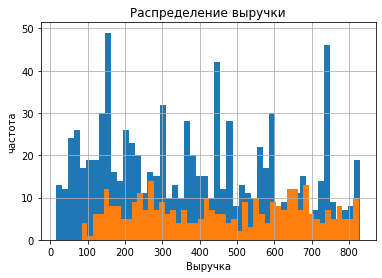

In [132]:
viruch_I.hist(bins=50)
viruch_II.hist(bins=50)
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.ylabel('частота')

Text(0, 0.5, 'частота')

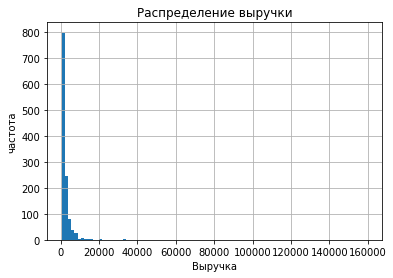

In [133]:
viruch_III.hist(bins=100)
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.ylabel('частота')

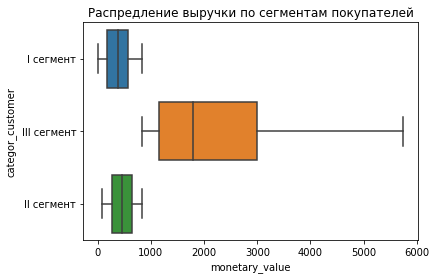

In [134]:
sns.boxplot(data=RFM_Segment_c, x='monetary_value', y='categor_customer', showfliers=False).set(title='Распредление выручки по сегментам покупателей')
plt.show()


На графиках видно, что распределение показателей не нормальное. Поэтому мы выбрали ранговый U-тест Манна-Уитни для проверки статистических гипотез. 

Мы проведем в целом 6 тестов. Для введения поправки на множественное тестирование мы выбрали метод Холма, потому что он считается наиболее «щадящим» методом по отношению к мощности теста. Он дает в среднем более высокие значения уровня значимости, чем аналоги (метод Бонферрони и метод Шидаки).

Но в то же время у него есть и проблемы, связанные с очередностью тестирования.

In [135]:
#Используем метод Холма для поправки на множественность сравнений.
m, alpha_h = 6, 0.05
result=[]
for i in range(m):
    result += [alpha_h/(m-i)]
display(result)

[0.008333333333333333, 0.01, 0.0125, 0.016666666666666666, 0.025, 0.05]

In [136]:
alpha = 0.05
results_viruch_I = st.mannwhitneyu(viruch_I, viruch_II)
print(f'p-value:{results_viruch_I.pvalue}')
if results_viruch_I.pvalue < alpha:
    print('Выручка с покупателя между I и II сегментами различается')
else:
    print('Нет оснований говорить, что есть разница между выручкой с покупателя между I и II сегментами')

p-value:1.0953417275153064e-07
Выручка с покупателя между I и II сегментами различается


In [137]:
results_viruch_II = st.mannwhitneyu(viruch_II, viruch_III)
print(f'p-value:{results_viruch_II.pvalue}')
if results_viruch_II.pvalue < alpha:
    print('Вероятно, что выручка с покупателя между II и III сегментами различается')
else:
    print('Нет оснований говорить, что есть разница между выручкой с покупателя между II и III сегментами')

p-value:8.707510028090583e-177
Вероятно, что выручка с покупателя между II и III сегментами различается


In [138]:
results_viruch_III = st.mannwhitneyu(viruch_I, viruch_III)
print(f'p-value:{results_viruch_III.pvalue}')
if results_viruch_III.pvalue < alpha:
    print('Вероятно, что выручка с покупателя между I и III сегментами различается')
else:
    print('Нет оснований говорить, что есть разница между выручкой с покупателя между I и III сегментами')

p-value:0.0
Вероятно, что выручка с покупателя между I и III сегментами различается


Тест показал, что выручка с клиентов по сегментам различается. 

p-value по всем трем тестам получился очень низкий, сильно ниже уровней значимости по Холму. Значит и при применении поправки на множественное тестирование можно говорить о значимых различиях в средней выручке с клиента между сегментами.

**Вторая гипотеза**  - есть ли различия в среднем чеке между покупателями из разных сегментов.

Нулевая гипотеза - различий нет. Средний чек у покупателей из разных сегментов одинаковый.

Альтернативная гипотеза - различия есть. Средний чек у покупателей из разных сегментов различается. В данном разеле мы оценим эти различия.

In [139]:
mean_chek_I = RFM_Segment_c[RFM_Segment_c['categor_customer'] == 'I сегмент']['mean_chek']
mean_chek_II = RFM_Segment_c[RFM_Segment_c['categor_customer'] == 'II сегмент']['mean_chek']
mean_chek_III = RFM_Segment_c[RFM_Segment_c['categor_customer'] == 'III сегмент']['mean_chek']

In [140]:
display(mean_chek_I.describe())
display(mean_chek_II.describe())
mean_chek_III.describe()

count    871.000000
mean     384.299656
std      229.724590
min       15.000000
25%      168.000000
50%      374.000000
75%      577.000000
max      831.000000
Name: mean_chek, dtype: float64

count    344.000000
mean     228.043120
std      106.914836
min       42.000000
25%      134.000000
50%      224.000000
75%      324.125000
max      413.250000
Name: mean_chek, dtype: float64

count     1214.000000
mean      1986.307794
std       2680.229068
min        312.666667
25%        928.250000
50%       1342.875000
75%       2186.625000
max      49432.000000
Name: mean_chek, dtype: float64

Text(0, 0.5, 'частота')

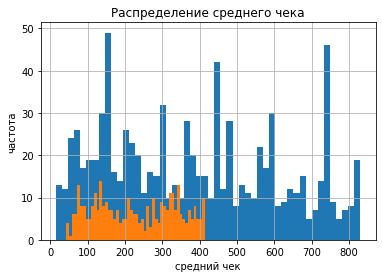

In [141]:
mean_chek_I.hist(bins=50)
mean_chek_II.hist(bins=50)
plt.title('Распределение среднего чека')
plt.xlabel('средний чек')
plt.ylabel('частота')

Text(0, 0.5, 'частота')

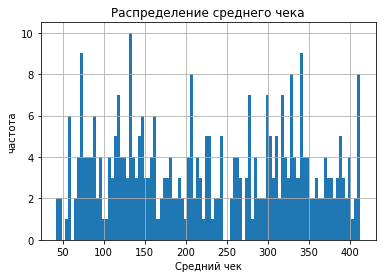

In [142]:
mean_chek_II.hist(bins=100)
plt.title('Распределение среднего чека')
plt.xlabel('Средний чек')
plt.ylabel('частота')

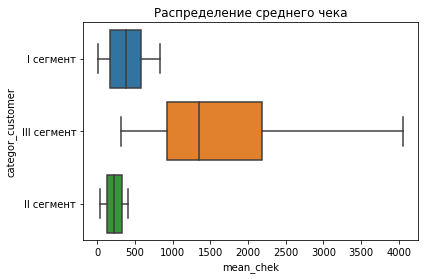

In [143]:
sns.boxplot(data=RFM_Segment_c, x='mean_chek', y='categor_customer', showfliers=False).set(title='Распределение среднего чека')
plt.show()

Распределение показателей не нормальное. Поэтому мы так же выбрали ранговый U-тест Манна-Уитни для проверки статистических гипотез.

In [144]:
alpha = 0.05
results_viruch_I = st.mannwhitneyu(mean_chek_I, mean_chek_II)
print(f'p-value:{results_viruch_I.pvalue}')
if results_viruch_I.pvalue < alpha:
    print('Вероятно, средний чек между I и II сегментами различается')
else:
    print('Нет оснований говорить, что есть разница между средним чеком I и II сегментами')

p-value:2.113078163833052e-25
Вероятно, средний чек между I и II сегментами различается


In [145]:
results_viruch_II = st.mannwhitneyu(mean_chek_II, mean_chek_III)
print(f'p-value:{results_viruch_II.pvalue}')
if results_viruch_II.pvalue < alpha:
    print('Вероятно, что средний чек между II и III сегментами различается')
else:
    print('Нет оснований говорить, что есть разница между между средним чеком II и III сегментами')

p-value:1.2833729904119474e-176
Вероятно, что средний чек между II и III сегментами различается


In [146]:
results_viruch_III = st.mannwhitneyu(mean_chek_I, mean_chek_III)
print(f'p-value:{results_viruch_III.pvalue}')
if results_viruch_III.pvalue < alpha:
    print('Вероятно, что средний чек между II и III сегментами различается')
else:
    print('Нет оснований говорить, что есть разница между между средним чеком II и III сегментами')

p-value:5.1659993794008584e-279
Вероятно, что средний чек между II и III сегментами различается


Мы так же обнаружили статистически значимые различия в средних чеках между сегментами

p-value по всем трем тестам получился очень низкий, сильно ниже уровней значимости по Холму. Значит и при применении поправки на множественное тестирование можно говорить о значимых различиях в средних чеках между сегментами покупателей.

**Итог проверки таков:** покупатели из второго сегмента (которые совершают покупки со средней и низкой стоимостью, но часто), выгоднее для магазина, чем покупатели из первого сегмента, так как выручка с покупатели во втором сегменте значимо выше, чем в первом сегменте. Клиенты из второго сегмента приносят больше выручки, чем из первого.

# 5. Выводы


1. У магазина снижается прибыль. Общая помесячная выручка магазина с течением времени снижается. Идет постепенное снижение и среднего чека (средней стоимости заказа). Средняя выручка с покупателя снижается с течением времени. 

2. Количество заказанных единиц товаров - снижается. Видимо поэтому снижается и общая прибыль

3. На пороге оттока - почти 75% клиентов. И это сказывается на прибыли магазина.

4. Мы определили список клиентов на которых требуется обратить внимание в первую очередь и постараться не допустить их оттока: их всего 7%. Их средняя выручка очень большая (4600 руб.), необходимо в первую очередь постараться вернуть этих клиентов. Для их возврата необходимо усилить таргетную рекламу и предложить индивидуальные скидки. Клиентов всего 176 человека - можно сделать персональные предложения.

5. Для клиентов которые находятся на пороге оттока, но их привлекательность стоит на втором месте, после предыдущей группы необходимо усилить таргетную рекламу и провести скидочные акции. Таких клиентов - 23%. Их необходимо побудить на покупки снова. По возможности увеличив частоту и размер покупок...

6. Постоянных покупателей можно разделить на четыре сегмента по средней частоте заказа в днях (один заказ до 25 дней, от 60 до 100 дней, от 125 до 155 дней и свыше 160 дней. С выделенными сегментами стоит подробнее поработать и разобраться от чего это зависит.

7.	Время жизни клиентов в целом похожи на сегменты по средней частоте заказа в днях. Клиенты - живущие до 25 дней, около 150 дней, около 250 дней и свыше 270 дней. Эти периоды стоит лучше изучить и понять, что влияет на них.

8. Были выделены 6 категорий товаров (растения, для дома, для ванной/туалета, для кухни, ремонт, уборка/стирка/глажка). Наибольшее количество наименований товаров в категории 'растения', наименьшее - 'для ванной/туалета'.

9. Мы разделили клиентов на три группы:

    1.	Клиенты совершающие редкие/разовые покупки низкой/средней стоимости - I сегмент. Прибыль от этой группы клиентов небольшая (составила 8,5% от общей прибыли магазина). Всего таких клиентов 36%. Средняя выручка равна среднему чеку и составила - 384 рубля.

    2. Клиенты совершающие частые покупки низкой/средней стоимости - II сегмент. Таких клиентов всего 14%, средняя выручка - 460 руб., средний чек 230 руб. Прибыль от них не большая - 4% от общей прибыли магазина.
     
    3. Клиенты совершающие покупки высокой стоимости - III сегмент. Их 50%, средняя выручка - 2800, средний чек - 1700, выручка от этих клиентов составила 87% общей прибыли.

10. Мы выяснили, что средняя выручка с клиентов по сегментам различается. Мы так же обнаружили статистически значимые различия в средних чеках между сегментами.

11. Покупатели из второго сегмента (которые совершают покупки со средней и низкой стоимостью, но часто), выгоднее для магазина, чем покупатели из первого сегмента, так как выручка с покупатели во втором сегменте значимо выше, чем в первом сегменте. Клиенты из второго сегмента приносят больше выручки, чем из первого.


12. Предложение по таркетной рекламе (список категорий из которых необходимо предлагать товары) (мы ориентировались на сезонность выручки по категориям товаров):

I сегмент покупателей
 1. январь - для кухни, растения, уборка/стирка/глажка.
 2. февраль - уборка 
 3. март - растения
 4. апрель - растения
 5. май - растения
 6. июнь - растения
 7. июль - растения, уборка/стирка/глажка
 8. август - ремонт, растения
 9. сентябрь - уборка/стирка/глажка, растения
 10. октябрь - уборка/стирка/глажка
 11. ноябрь - растения
 12. декабрь - для кухни, растения

II сегмент покупателей
 1. январь - растения, уборка/стирка/глажка
 2. февраль - растения, уборка/стирка/глажка
 3. март - растения, уборка/стирка/глажка, для ддома
 4. апрель - растения
 5. май - уборка/стирка/глажка
 6. июнь - уборка/стирка/глажка
 7. июль - уборка/стирка/глажка
 8. август - растения, уборка/стирка/глажка
 9. сентябрь - растения, уборка/стирка/глажка
 10. октябрь - растения, уборка/стирка/глажка
 11. ноябрь - растения, уборка/стирка/глажка, для дома
 12. декабрь - растения, уборка/стирка/глажка, кухня

III сегмент покупателей
 1. январь - уборка/стирка/глажка, для дома
 2. февраль - уборка/стирка/глажка, ремонт
 3. март - ремонт, уборка/стирка/глажка
 4. апрель - растения, ремонт
 5. май - растения
 6. июнь - для дома
 7. июль - уборка/стирка/глажка, ремонт
 8. август - ремонт, уборка/стирка/глажка
 9. сентябрь - ремонт, уборка/стирка/глажка, для кухни
 10. октябрь - ремонт, уборка/стирка/глажка
 11. ноябрь - ремонт, уборка/стирка/глажка
 12. декабрь - ремонт, уборка/стирка/глажка






# 6. Создание презентации исследования.
Презентация будет создана после проверки и одобрения работы ментором

https://disk.yandex.ru/i/1RLvTNZGMQ2_GA